In [ ]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import numpy as np

Activamos Google Drive para importar las bases de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos las bases de datos a utilizar

In [ ]:
B2019_I = pd.read_csv('/content/drive/MyDrive/Muestreo/1 - Datos Limpiados/2019-I.csv')
B2019_II = pd.read_csv('/content/drive/MyDrive/Muestreo/1 - Datos Limpiados/2019-II.csv')
B2020_I = pd.read_csv('/content/drive/MyDrive/Muestreo/1 - Datos Limpiados/2020-I.csv')
B2020_II = pd.read_csv('/content/drive/MyDrive/Muestreo/1 - Datos Limpiados/2020-II.csv')
B2021_I = pd.read_csv('/content/drive/MyDrive/Muestreo/1 - Datos Limpiados/2021-I.csv')

**Objetivos a trabajar en este cuaderno**

1. Tiempo promedio de asesoría (por semestre)

2. Total de tiempo de asesoría (por semestre)

3. Proporción de materias (por semestre)

4. Total de alumnos por carrera (por semestre)

**Tipos de gráficas a realizar en**

1. Histograma de frecuencias

2. Gráfico de barras horizontal

3. Gráfico de pastel

4. Gráfico de barras vertical apilado

El gráfico del punto 2 es un solo gráfico que contiene el total de tiempo de asesoría por semestre.

Los gráficos del punto 1 y 3, es decir Tiempo promedio de asesoría y Proporción de materias, deberán mostrar en una misma ventana los cinco gráficos.

Toda la información encontrada en cada punto debe ir contenida en una tabla. Por ejemplo, para el tiempo promedio de asesoría.

|Semestre|Tiempo promedio de asesoría|
|--------|---------------------------|
|$$2019-I$$|$$XXX$$|
|$$2019-II$$|$$XXX$$|
|$$2020-I$$|$$XXX$$|
|$$2020-II$$|$$XXX$$|
|$$2021-I$$|$$XXX$$|

#Limpieza y filtrado

##$2019 - I$

### Limpieza general de la base de datos

In [ ]:
B2019_I.head(4)

,NOMBRE DEL ALUMNO,MATRICULA,CARRERA,FECHA,HORA ENTRADA,HORA SALIDA,TIEMPO (MIN),UNIDAD DE APRENDIZAJE,TEMA,MAESTRO O DEPENDENCIA,TUTOR,NOMBRE DEL ASESOR,AREA DEL ASESOR,CATEGORIA DEL ASESOR,MES DE LA ASESORIA
0,TOLENTINO ARELI FERNANDA,1726724.0,LA,1/2/2019,9:24:00 a. m.,9:55:00 a. m.,31,Probabilidad,NINGUNO,ABIGAIL,NO,ADRIAN HERNANDEZ,ALM,SS,1
1,SOSA LESLIE,1728777.0,LA,1/2/2019,9:24:00 a. m.,9:55:00 a. m.,31,Probabilidad,NINGUNO,ABIGAIL,NO,ADRIAN HERNANDEZ,ALM,SS,1
2,RODRIGUEZ CRISTINA,1843290.0,LA,1/2/2019,8:03:00 a. m.,8:54:00 a. m.,51,Algebra,NINGUNO,ANGEL PEREZ,NO,ADRIAN HERNANDEZ,ALM,SS,1
3,CARRANZA ADI,1861870.0,LMAD,1/2/2019,8:03:00 a. m.,8:54:00 a. m.,51,Algebra,NINGUNO,ANGEL PEREZ,NO,ADRIAN HERNANDEZ,ALM,SS,1


**NOTA : Al momento de la limpieza me di cuenta que Calculo se repetia dos veces y esto sucedió porque se encontraba «Calculo » y «Calculo». El siguiente código es para resolver ese problema**

In [ ]:
B2019_Calculo = B2019_I.loc[B2019_I.loc[:,'UNIDAD DE APRENDIZAJE '] == 'Calculo '] #FILTRO AQUELLOS QUE TENGAN CALCULO CON ESPACIO Y LO ASIGNO A B2019_Calculo
B2019_Calculo['UNIDAD DE APRENDIZAJE '].replace('Calculo ','Calculo',inplace = True) #MODIFICO TODOS ESTOS DATOS QUITANDO EL ESPACIO Y MODIFICO B2019_Calculo

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
B2019_I = pd.concat([B2019_I.drop(list(B2019_Calculo.index)),B2019_Calculo],axis=0) #AL DATA FRAME ORIGINAL LE QUITO LAS FILAS QUE TENIAN ESTE PROLEMA Y LO CONCATENO CON EL DF ARREGLADO

Solamente nos quedaremos con la información correspondiente a las carreras dadas en la facultad FCFM.

In [ ]:
B2019_I = B2019_I[B2019_I.CARRERA.isin(['LM','LA','LCC','LSTI','LF','LMAD'])]

### Limpieza para el tiempo y gráfico (promedio y total)

Nosotros queremos calcular la media del tiempo de asesoría, primero hacemos una clasificación del tiempo pues por la manera en que estan estructurados algunos datos hace imposible la limpieza general dando como resultado tiempos negativos que no son lógicos o tiempos demasiados extensos. Por tanto la clasifación que tomaremos son aquellos tiempos de asesoría mayores a 5 minutos pero menores a 360 minutos (6 horas)

Este filtrado lo asignamos a la variable 'B2019_I_Tiempo'

In [ ]:
B2019_I_Tiempo = B2019_I.loc[ B2019_I.loc[:,'TIEMPO (MIN)'] >= 5]
B2019_I_Tiempo = B2019_I_Tiempo.loc[ B2019_I_Tiempo.loc[:,'TIEMPO (MIN)'] <= 360 ]

Calculamos el promedio de tiempo de asesoría con la función mean y lo asignamos a la variable 'B2019_I_Promedio_Tiempo'

In [ ]:
B2019_I_Promedio_Tiempo = B2019_I_Tiempo.loc[:,'TIEMPO (MIN)'].mean()
B2019_I_Promedio_Tiempo

74.22073984232868

Para realizar el histograma de frecuencias solamente filtramos la columna 'TIEMPO (MIN)' y lo asignamos a la variable 'B2019_I_Hist_Tiempo'

In [ ]:
B2019_I_Hist_Tiempo = B2019_I_Tiempo.loc[:,'TIEMPO (MIN)']

Para calcular el total de tiempo de asesoría usamos la función sum y lo asignamos a la variable 'B2019_I_Total_Tiempo'

In [ ]:
B2019_I_Total_Tiempo = B2019_I_Tiempo.loc[:,'TIEMPO (MIN)'].sum()
B2019_I_Total_Tiempo

122390

### Limpieza para gráfico de pastel

Queremos una proporción de materias, por lo tanto extraemos la columna «UNIDAD DE APRENDIZAJE» y lo asignamos a la variable B2019_I_UA.

In [ ]:
B2019_I_UA = B2019_I.loc[:,'UNIDAD DE APRENDIZAJE '].value_counts().to_frame() #CONTABILIZAMOS CUANTAS VECES SE REPITE CADA MATERIA Y LO HACEMOS DATA FRAME
B2019_I_UA

,UNIDAD DE APRENDIZAJE
Calculo,430
Probabilidad,248
Algebra,215
Algebra Lineal,135
Geometria Analitica,99
...,...
Seguridad en Base de Datos,1
Seguro de Danos,1
Topicos de Analisis Matematico,1
Telecomunicaciones I,1


Las materias que fueron solicitadas menos de 20 veces las agregaremos a la variable B_2019_I_UA_Otros, esto lo hacemos por estética del gráfico y **NO** por el cálculo de las proporciones.

In [ ]:
B2019_I_UA_Otros = B2019_I_UA.loc[ B2019_I_UA.loc[:,'UNIDAD DE APRENDIZAJE '] < 99 ]

Eliminamos del Data Frame B_2019_I_UA las materias que se solicitan menos de 20 veces

In [ ]:
B2019_I_UA.drop(list(B2019_I_UA_Otros.index),inplace = True)

Añadimos la fila 'Otros' que indicará cuantas veces la proporción de materias con una frecuencia menor o igual a 20

In [ ]:
B2019_I_UA.loc['Otros'] = B2019_I_UA_Otros.sum()

In [ ]:
B2019_I_UA

,UNIDAD DE APRENDIZAJE
Calculo,430
Probabilidad,248
Algebra,215
Algebra Lineal,135
Geometria Analitica,99
Otros,666


### Limpieza para obtener la proporción de materias

Filtramos nuevamente la columna «UNIDAD DE APRENDIZAJE», contamos el número de veces que fue solicitado una sola materia

In [ ]:
B2019_I_UA2 = B2019_I.loc[:,'UNIDAD DE APRENDIZAJE '].value_counts().to_frame()
B2019_I_UA2 

,UNIDAD DE APRENDIZAJE
Calculo,430
Probabilidad,248
Algebra,215
Algebra Lineal,135
Geometria Analitica,99
...,...
Seguridad en Base de Datos,1
Seguro de Danos,1
Topicos de Analisis Matematico,1
Telecomunicaciones I,1


Contamos el número total de asesorías

In [ ]:
B2019_I_UA2['UNIDAD DE APRENDIZAJE '].sum()

1793

Añadimos una nueva columna a B2019_I_UA2 llamada "Proporción" que contenga la proporción de cada una de las materias

In [ ]:
B2019_I_UA2['Proporcion'] = (B2019_I_UA2['UNIDAD DE APRENDIZAJE ']/B2019_I_UA2['UNIDAD DE APRENDIZAJE '].sum())*100

Asignamos a la variable «B2019_Proporcion_Materias» solamente la columna Proporción de la variable B2019_I_UA2

In [ ]:
B2019_Proporcion_Materias = B2019_I_UA2.loc[:,'Proporcion'].to_frame()
B2019_Proporcion_Materias

,Proporcion
Calculo,23.982153
Probabilidad,13.831567
Algebra,11.991076
Algebra Lineal,7.529281
Geometria Analitica,5.521472
...,...
Seguridad en Base de Datos,0.055772
Seguro de Danos,0.055772
Topicos de Analisis Matematico,0.055772
Telecomunicaciones I,0.055772


### Limpieza para obtener el total de alumnos por carrera y el gráfico

Asignamos a la variable «B2019_Carrera» solamente la columna Carrera de la base de datos.

In [ ]:
B2019_Carrera = B2019_I.loc[:,'CARRERA']

Asignamos a la variable «B2019_Carrera_Total» el conteo del numero de veces que se repite cada carrera

In [ ]:
B2019_Carrera_Total = B2019_Carrera.value_counts().to_frame()

In [ ]:
B2019_Carrera_Total

,CARRERA
LA,902
LMAD,264
LCC,189
LF,155
LSTI,146
LM,137


##$2019 - II$

### Limpieza general de la base de datos

In [ ]:
B2019_II.head(4)

,NOMBRE DEL ALUMNO,MATRICULA,CARRERA,FECHA,HORA ENTRADA,HORA SALIDA,TIEMPO (MIN),UNIDAD DE APRENDIZAJE,TEMA,MAESTRO O DEPENDENCIA,TUTOR,NOMBRE DEL ASESOR,AREA DEL ASESOR,CATEGORIA DEL ASESOR,MES DE LA ASESORIA
0,Aranza Estebanas,1941599,LA,12/2/2012,9:05,9:45,40,Probabilidad,Momentos,Abigail,JOSUE EMMANUEL GUILLEN HERNANDEZ,NaN,NaN,NaN,NaN
1,LOPEZ GONZALEZ ALEJANDRO,1827682,LSTI,05-08-19,17:25,18:13,48,Algebra,FACTORIZACION,FCFM,NO,EDGAR BELTRAN,NaN,NaN,NaN
2,ALCACER JIMENEZ GERSON HIRAM,1929370,LSTI,05-08-19,17:01,18:01,60,Algebra,FACTORIZACION,DIEGO GOMEZ,NO,RAUL TORRES,NaN,NaN,NaN
3,DE LA GARZA GUTIERREZ ANDREA CAROLINA,1990128,LF,05-08-19,12:00,13:50,110,Algebra,ANALISIS,NINGUNO,NO,RICARDO LOPEZ,NaN,NaN,NaN


Solamente nos quedaremos con la información correspondiente a las carreras dadas en la facultad FCFM.

In [ ]:
B2019_II = B2019_II[B2019_II.CARRERA.isin(['LM','LA','LCC','LSTI','LF','LMAD'])]

Vamos a leer los tipos de datos que hay en la base de datos

In [ ]:
B2019_II.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1661 entries, 0 to 1716
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NOMBRE DEL ALUMNO       1661 non-null   object 
 1   MATRICULA               1660 non-null   object 
 2   CARRERA                 1661 non-null   object 
 3   FECHA                   1661 non-null   object 
 4   HORA ENTRADA            1661 non-null   object 
 5   HORA SALIDA             1656 non-null   object 
 6   TIEMPO (MIN)            1661 non-null   object 
 7   UNIDAD DE APRENDIZAJE   1661 non-null   object 
 8   TEMA                    1655 non-null   object 
 9   MAESTRO O DEPENDENCIA   1616 non-null   object 
 10  TUTOR                   1533 non-null   object 
 11  NOMBRE DEL ASESOR       1495 non-null   object 
 12  AREA DEL ASESOR         0 non-null      float64
 13  CATEGORIA DEL ASESOR    0 non-null      float64
 14  MES DE LA  ASESORIA     0 non-null      

Notemos que la columna 'TIEMPO (MIN)' tiene datos tipo 'object', es decir, texto. Convertimos los datos de esta columna en datos tipo 'float'

In [ ]:
B2019_II.drop(1396,axis = 0,inplace = True)

In [ ]:
B2019_II['TIEMPO (MIN)'] = B2019_II['TIEMPO (MIN)'].astype(float)

### Limpieza para el tiempo y gráfico (promedio y total)

Nosotros queremos calcular la media del tiempo de asesoría, primero hacemos una clasificación del tiempo pues por la manera en que estan estructurados algunos datos hace imposible la limpieza general dando como resultado tiempos negativos que no son lógicos o tiempos demasiados extensos. Por tanto la clasifación que tomaremos son aquellos tiempos de asesoría mayores a 5 minutos pero menores a 360 minutos (6 horas)

Esto lo asignamos a la variable 'B2019_II_Tiempo'

In [ ]:
B2019_II_Tiempo = B2019_II.loc[ B2019_II.loc[:,'TIEMPO (MIN)'] >= 5 ]
B2019_II_Tiempo = B2019_II_Tiempo.loc[ B2019_II_Tiempo.loc[:,'TIEMPO (MIN)'] <= 360]

Calculamos el promedio de tiempo de asesoría con la función mean y lo asignamos a la variable 'B2019_II_Promedio_Tiempo'

In [ ]:
B2019_II_Promedio_Tiempo = B2019_II_Tiempo.loc[:,'TIEMPO (MIN)'].mean()
B2019_II_Promedio_Tiempo

72.07878017789072

Para realizar el histograma de frecuencias solamente filtramos la columna 'TIEMPO (MIN)' y lo asignamos a la variable 'B2019_II_Hist_Tiempo'

In [ ]:
B2019_II_Hist_Tiempo = B2019_II_Tiempo.loc[:,'TIEMPO (MIN)']

Para calcular el total de tiempo de asesoría usamos la función sum y lo asignamos a la variable 'B2019_II_Total_Tiempo'

In [ ]:
B2019_II_Total_Tiempo = B2019_II_Tiempo.loc[:,'TIEMPO (MIN)'].sum()
B2019_II_Total_Tiempo

113452.0

### Limpieza para el gráfico de pastel

Queremos una proporción de materias, por lo tanto extraemos la columna «UNIDAD DE APRENDIZAJE» y lo asignamos a la variable B2019_II_UA.

In [ ]:
B2019_II_UA = B2019_II.loc[:,'UNIDAD DE APRENDIZAJE '].value_counts().to_frame()

Las materias que fueron solicitadas menos de 20 veces las agregaremos a la variable B_2019_II_UA_Otros, esto lo hacemos por estética del gráfico y **NO** por el cálculo de las proporciones.

In [ ]:
B2019_II_UA_Otros = B2019_II_UA.loc[ B2019_II_UA.loc[:,'UNIDAD DE APRENDIZAJE '] <= 84 ]

Eliminamos del Data Frame B_2019_II_UA las materias que se solicitan menos de 20 veces

In [ ]:
B2019_II_UA.drop(list(B2019_II_UA_Otros.index),inplace = True)

Añadimos la fila 'Otros' que indicará cuantas veces la proporción de materias con una frecuencia menor o igual a 20

In [ ]:
B2019_II_UA.loc['Otros'] = B2019_II_UA_Otros.sum()

In [ ]:
B2019_II_UA

,UNIDAD DE APRENDIZAJE
Algebra,357
Calculo,341
Geometria Analitica,324
Algebra Lineal,108
Otros,530


### Limpieza para obtener la proporción de materias 

Filtramos nuevamente la columna «UNIDAD DE APRENDIZAJE», contamos el número de veces que fue solicitado una sola materia

In [ ]:
B2019_II_UA2 = B2019_II.loc[:,'UNIDAD DE APRENDIZAJE '].value_counts().to_frame()

Contamos el número total de asesorías

In [ ]:
B2019_II_UA2.loc[:,'UNIDAD DE APRENDIZAJE '].sum()

1660

Añadimos una nueva columna a B2019_II_UA2 llamada "Proporción" que contenga la proporción de cada una de las materias

In [ ]:
B2019_II_UA2['Proporcion'] = (B2019_II_UA2['UNIDAD DE APRENDIZAJE ']/B2019_II_UA2['UNIDAD DE APRENDIZAJE '].sum())*100

Asignamos a la variable «B2019_Proporcion_Materias_II» solamente la columna Proporción de la variable B2019_II_UA2

In [ ]:
B2019_Proporcion_Materias_II = B2019_II_UA2.loc[:,'Proporcion'].to_frame()

In [ ]:
B2019_Proporcion_Materias_II

,Proporcion
Algebra,21.506024
Calculo,20.542169
Geometria Analitica,19.518072
Algebra Lineal,6.506024
Probabilidad,5.060241
Calculo Diferencial y Geometria Analitica,3.253012
Fisica Basica,2.891566
Metodologia de la Programacion,2.710843
Programacion Estructurada,2.108434
Topicos de Algebra,2.048193


### Limpieza para obtener el total de alumnos por carrera y el gráfico

Asignamos a la variable «B2019_II_Carrera» solamente la columna Carrera de la base de datos.

In [ ]:
B2019_II_Carrera = B2019_II.loc[:,'CARRERA']

Asignamos a la variable «B2019_II_Carrera_Total» el conteo del numero de veces que se repite cada carrera

In [ ]:
B2019_II_Carrera_Total = B2019_II_Carrera.value_counts().to_frame()

In [ ]:
B2019_II_Carrera_Total

,CARRERA
LA,622
LMAD,289
LSTI,251
LF,228
LCC,178
LM,92


## $2020 - I$

### Limpieza general de la base de datos

In [ ]:
B2020_I.head(4)

,Nombre del Alumno,Matrícula,Carrera,Fecha formato: dd/mm/aa,Hora inicio formato: 24 hrs.,Hora término formato: 24 hrs.,TIEMPO (MIN),Unidad de Aprendizaje,Tema,Solucionó duda SI/NO,Profesor/ Dependencia,Nombre completo del Asesor,Unnamed: 12,Unnamed: 13
0,ramon alberto zapata cruz,1848881,LCC,1/1/2020,11:07,11:28,21,Matematicas Discretas,tablas de valor,NaN,FCFM,PABLO EMILIO LOPEZ AVILA,NaN,NaN
1,Rodrigo Gomez,588338,LSTI,1/8/2020,17:00,18:00,60,Calculo y Geometria Analitica,Practica,NaN,NaN,KEVIN ORLANDO VERDE RODRIGUEZ,NaN,NaN
2,jesus arturo rodriguez,1669973,LMAD,1/8/2020,8:00,11:11,191,Calculo,todo,NaN,FCFM,PABLO EMILIO LOPEZ AVILA,NaN,NaN
3,Rodrigo Gomez,588339,LSTI,1/9/2020,17:00,18:00,60,Calculo y Geometria Analitica,Practica,NaN,NaN,KEVIN ORLANDO VERDE RODRIGUEZ,NaN,NaN


Como tenemos mas carreras y facultades , tenemos que sesgar a solo las carreras de la FCFM

In [ ]:
B2020_I= B2020_I[B2020_I.Carrera.isin(['LM','LA','LCC','LSTI','LF','LMAD'])]

Ya teniendo solo las carreras de la FCFM, entonces ahora observamos que ninguna carrera se repite , por lo que no hay cambios y Solamente nos quedaremos con la información correspondiente a las carreras dadas en la facultad FCFM.


In [ ]:
B2020_I.loc[:,'Carrera'].value_counts()

LA      298
LCC     197
LMAD    159
LF      110
LSTI     97
LM       69
Name: Carrera, dtype: int64

Vamos a leer los tipos de datos que hay en la base de datos

In [ ]:
B2020_I.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 0 to 942
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Nombre del Alumno                   930 non-null    object 
 1   Matrícula                           929 non-null    object 
 2   Carrera                             930 non-null    object 
 3   Fecha        formato: dd/mm/aa      930 non-null    object 
 4   Hora inicio       formato: 24 hrs.  930 non-null    object 
 5   Hora término      formato: 24 hrs.  925 non-null    object 
 6   TIEMPO (MIN)                        930 non-null    object 
 7   Unidad de Aprendizaje               930 non-null    object 
 8   Tema                                920 non-null    object 
 9   Solucionó duda            SI/NO     220 non-null    object 
 10  Profesor/   Dependencia             758 non-null    object 
 11  Nombre completo del Asesor          889 non-n

Notemos que la columna 'TIEMPO (MIN)' tiene datos tipo 'object', es decir, texto. Convertimos los datos de esta columna en datos tipo 'float'

In [ ]:
B2020_I.loc[B2020_I.loc[:,'TIEMPO (MIN)']=='-1,298']

,Nombre del Alumno,Matrícula,Carrera,Fecha formato: dd/mm/aa,Hora inicio formato: 24 hrs.,Hora término formato: 24 hrs.,TIEMPO (MIN),Unidad de Aprendizaje,Tema,Solucionó duda SI/NO,Profesor/ Dependencia,Nombre completo del Asesor,Unnamed: 12,Unnamed: 13
259,Alison Nayeli González Lara,1904357,LCC,2/5/2020,1,2:22,"-1,298",Matematicas Discretas,Logica y conjuntos,NaN,NaN,RAFAEL ENRIQUE ALMARAZ MARTINEZ,NaN,NaN


In [ ]:
B2020_I.loc[B2020_I.loc[:,'TIEMPO (MIN)']=='-1,024']

,Nombre del Alumno,Matrícula,Carrera,Fecha formato: dd/mm/aa,Hora inicio formato: 24 hrs.,Hora término formato: 24 hrs.,TIEMPO (MIN),Unidad de Aprendizaje,Tema,Solucionó duda SI/NO,Profesor/ Dependencia,Nombre completo del Asesor,Unnamed: 12,Unnamed: 13
261,ERWIN ELIUD GARCIA MATA,1845054,LMAD,2/5/2020,1,6:56,"-1,024",Algebra,LABORATORIO,NaN,FCFM,ZULEMA YAHAIRA URQUIETA GARCIA,NaN,NaN


In [ ]:
B2020_I.loc[B2020_I.loc[:,'TIEMPO (MIN)']=='-1,440']

,Nombre del Alumno,Matrícula,Carrera,Fecha formato: dd/mm/aa,Hora inicio formato: 24 hrs.,Hora término formato: 24 hrs.,TIEMPO (MIN),Unidad de Aprendizaje,Tema,Solucionó duda SI/NO,Profesor/ Dependencia,Nombre completo del Asesor,Unnamed: 12,Unnamed: 13
302,Cesar Alonso García,1859187,LCC,2/10/2020,1,NaN,"-1,440",Otros,NaN,NaN,NaN,ELI ISRAEL DELGADO ESCARCEGA,NaN,NaN
447,JARAMILLO SANCHEZ LUIS,1900905,LSTI,2/17/2020,1,NaN,"-1,440",Otros,NaN,NaN,NaN,ELI ISRAEL DELGADO ESCARCEGA,NaN,NaN


In [ ]:
B2020_I.drop(259,axis = 0,inplace = True)

In [ ]:
B2020_I.drop(261,axis = 0,inplace = True)

In [ ]:
B2020_I.drop(302,axis = 0,inplace = True)

In [ ]:
B2020_I.drop(447,axis = 0,inplace = True)

In [ ]:
B2020_I['TIEMPO (MIN)'] = B2020_I['TIEMPO (MIN)'].astype(float)

### Limpieza para el tiempo y gráfico (promedio y total)

Nosotros queremos calcular la media del tiempo de asesoría, primero hacemos una clasificación del tiempo pues por la manera en que estan estructurados algunos datos hace imposible la limpieza general dando como resultado tiempos negativos que no son lógicos o tiempos demasiados extensos. Por tanto la clasifación que tomaremos son aquellos tiempos de asesoría mayores a 5 minutos pero menores a 360 minutos (6 horas)

Esto lo asignamos a la variable 'B2020_II_Tiempo'

In [ ]:
B2020_I_Tiempo = B2020_I.loc[ B2020_I.loc[:,'TIEMPO (MIN)'] >= 5 ]
B2020_I_Tiempo = B2020_I_Tiempo.loc[ B2020_I_Tiempo.loc[:,'TIEMPO (MIN)'] <= 360]

Calculamos el promedio de tiempo de asesoría con la función mean y lo asignamos a la variable 'B2020_I_Promedio_Tiempo'

In [ ]:
B2020_I_Promedio_Tiempo = B2020_I_Tiempo.loc[:,'TIEMPO (MIN)'].mean()
B2020_I_Promedio_Tiempo

66.53626373626373

Para realizar el histograma de frecuencias solamente filtramos la columna 'TIEMPO (MIN)' y lo asignamos a la variable 'B2020_I_Hist_Tiempo'

In [ ]:
B2020_I_Hist_Tiempo = B2020_I_Tiempo.loc[:,'TIEMPO (MIN)']

Para calcular el total de tiempo de asesoría usamos la función sum y lo asignamos a la variable 'B2020_I_Total_Tiempo'

In [ ]:
B2020_I_Total_Tiempo = B2020_I_Tiempo.loc[:,'TIEMPO (MIN)'].sum()
B2020_I_Total_Tiempo

60548.0

###Limpieza para gráfico de pastel

Como Queremos una proporción de materias, entonces extraemos la columna «Unidad de Aprendizaje» y lo asignamos a la variable B2020_I_UA.

In [ ]:
B2020_I_UA = B2020_I.loc[:,'Unidad de Aprendizaje'].value_counts().to_frame() #CONTABILIZAMOS CUANTAS VECES SE REPITE CADA MATERIA Y LO HACEMOS DATA FRAME
B2020_I_UA

,Unidad de Aprendizaje
Calculo,208
Algebra,98
Programacion,79
Topicos de Algebra,66
Probabilidad,45
Geometria Analitica,42
Otros,40
Ecuaciones Diferenciales,34
Algebra Lineal,27
Fisica,26


Las materias que fueron solicitadas menos de 20 veces las agregaremos a la 
variable B_2020_I_UA_Otros, esto lo hacemos por estética del gráfico y NO por el cálculo de las proporciones.

In [ ]:
B2020_I_UA_Otros = B2020_I_UA.loc[ B2020_I_UA.loc[:,'Unidad de Aprendizaje'] <= 44 ]

Eliminamos del Data Frame B_2020_I_UA las materias que se solicitan menos de 20 veces

In [ ]:
B2020_I_UA.drop(list(B2020_I_UA_Otros.index),inplace = True)

Añadimos la fila 'Otros' que indicará cuantas veces la proporción de materias con una frecuencia menor o igual a 20

In [ ]:
B2020_I_UA.loc['Otros'] = B2020_I_UA_Otros.sum()

In [ ]:
B2020_I_UA

,Unidad de Aprendizaje
Calculo,208
Algebra,98
Programacion,79
Topicos de Algebra,66
Probabilidad,45
Otros,430


###Limpieza para obtener la proporción de materias

Filtramos nuevamente la columna «Unidad de Aprendizaje», contamos el número de veces que fue solicitado una sola materia

In [ ]:
B2020_I_UA2 = B2020_I.loc[:,'Unidad de Aprendizaje'].value_counts().to_frame()
B2020_I_UA2 

,Unidad de Aprendizaje
Calculo,208
Algebra,98
Programacion,79
Topicos de Algebra,66
Probabilidad,45
Geometria Analitica,42
Otros,40
Ecuaciones Diferenciales,34
Algebra Lineal,27
Fisica,26


Contamos el número total de asesorías

In [ ]:
B2020_I_UA2['Unidad de Aprendizaje'].sum()

926

Añadimos una nueva columna a B2020_I_UA2 llamada "Proporción" que contenga la proporción de cada una de las materias

In [ ]:
B2020_I_UA2['Proporcion'] = (B2020_I_UA2['Unidad de Aprendizaje']/B2020_I_UA2['Unidad de Aprendizaje'].sum())*100

Asignamos a la variable «B2020_Proporcion_Materias» solamente la columna Proporción de la variable B2020_I_UA2

In [ ]:
B2020_Proporcion_Materias = B2020_I_UA2.loc[:,'Proporcion'].to_frame()
B2020_Proporcion_Materias

,Proporcion
Calculo,22.462203
Algebra,10.583153
Programacion,8.531317
Topicos de Algebra,7.127430
Probabilidad,4.859611
Geometria Analitica,4.535637
Otros,4.319654
Ecuaciones Diferenciales,3.671706
Algebra Lineal,2.915767
Fisica,2.807775


###Limpieza para obtener el total de alumnos por carrera y el gráfico

Asignamos a la variable «B2020_Carrera» solamente la columna Carrera de la base de datos.

In [ ]:
B2020_Carrera = B2020_I.loc[:,'Carrera']

Asignamos a la variable «B2020_Carrera_Total» el conteo del numero de veces que se repite cada carrera

In [ ]:
B2020_I_Carrera_Total = B2020_Carrera.value_counts().to_frame()

In [ ]:
B2020_I_Carrera_Total

,Carrera
LA,298
LCC,195
LMAD,158
LF,110
LSTI,96
LM,69


##$2020 - II$

### Limpieza general de la base de datos 

In [ ]:
B2020_II.head(4)

,Nombre del Alumno,Matrícula,Carrera,Fecha formato: dd/mm/aa,Hora inicio formato: 24 hrs.,Hora término formato: 24 hrs.,TIEMPO (MIN),Unidad de Aprendizaje,Tema,Solucionó duda SI/NO,Profesor/ Dependencia,Nombre completo del Asesor
0,BRAYAN IVÁN DE LA CRUZ MARTÍNEZ,1904210,LF,30/10/2020,10:23,NaN,-623,Probabilidad,NaN,SI,JHOSBAN ALBERTO MACHORRO MAYOR,ARANZA LISSET MARTINEZ ORTEGA
1,ALAN LIBRADO CARRIZALES MANZANARES,1897486,LMAD,23/10/2020,3:44,5:00,76,Programacion Estructurada,TAREA,SI,DAVID RAMIREZ LOPEZ,JOSE RICARDO CONTRERAS RESENDEZ
2,CRISTHIAN EMMANUEL VALENCIA BONILLA,1852038,LA,21/10/2020,10:16,NaN,-616,Probabilidad,DISTRIBUCIÓN GEOMÉTRICA,NaN,NaN,GERARDO PÉREZ ARRIAGA
3,JESÚS ISAÍ ZARATE ESTEVA,NaN,LF,21/10/2020,8:35,NaN,-515,Probabilidad,DISTRIBUCIÓN CONJUNTA,SÍ,ADRIÁN ALMAGUER,GERARDO PÉREZ ARRIAGA


Solamente nos quedaremos con la información correspondiente a las carreras dadas en la facultad FCFM

In [ ]:
B2020_II = B2020_II[B2020_II.Carrera.isin(['LM','LA','LCC','LSTI','LF','LMAD'])]

Vamos a leer los tipos de datos que tiene nuestra base de datos


In [ ]:
B2020_II.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 589
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Nombre del Alumno                   584 non-null    object
 1   Matrícula                           583 non-null    object
 2   Carrera                             584 non-null    object
 3   Fecha        formato: dd/mm/aa      584 non-null    object
 4   Hora inicio       formato: 24 hrs.  584 non-null    object
 5   Hora término      formato: 24 hrs.  580 non-null    object
 6   TIEMPO (MIN)                        580 non-null    object
 7   Unidad de Aprendizaje               584 non-null    object
 8   Tema                                583 non-null    object
 9   Solucionó duda            SI/NO     580 non-null    object
 10  Profesor/   Dependencia             540 non-null    object
 11  Nombre completo del Asesor          577 non-null    object

Notemos que la columna 'TIEMPO (MIN)' tiene datos tipo object, es decir de tipo texto. Convertimos los datos de esta columna en datos tipo 'float'

In [ ]:
B2020_II.rename(columns = {'TIEMPO (MIN)':'TIEMPO_(MIN)'}, inplace = True)

In [ ]:
B2020_II.loc[B2020_II.loc[:,'TIEMPO_(MIN)']== '-1,028']


,Nombre del Alumno,Matrícula,Carrera,Fecha formato: dd/mm/aa,Hora inicio formato: 24 hrs.,Hora término formato: 24 hrs.,TIEMPO_(MIN),Unidad de Aprendizaje,Tema,Solucionó duda SI/NO,Profesor/ Dependencia,Nombre completo del Asesor
292,ALEJANDRO SÁNCHEZ NAVA,1902362,LA,10/12/2020,17:08,NaN,"-1,028",Probabilidad,FUNCIÓN DE DISTRIBUCIÓN Y MOMENTOS,SÍ,ROSA ISELA HERNANDEZ ZAMORA,GERARDO PÉREZ ARRIAGA


Eliminamos esta hilera 

In [ ]:
B2020_II.drop(292,axis = 0,inplace= True)

In [ ]:
B2020_II['TIEMPO_(MIN)'] = B2020_II['TIEMPO_(MIN)'].astype(float)

In [ ]:
B2020_II.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 589
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Nombre del Alumno                   583 non-null    object 
 1   Matrícula                           582 non-null    object 
 2   Carrera                             583 non-null    object 
 3   Fecha        formato: dd/mm/aa      583 non-null    object 
 4   Hora inicio       formato: 24 hrs.  583 non-null    object 
 5   Hora término      formato: 24 hrs.  580 non-null    object 
 6   TIEMPO_(MIN)                        579 non-null    float64
 7   Unidad de Aprendizaje               583 non-null    object 
 8   Tema                                582 non-null    object 
 9   Solucionó duda            SI/NO     579 non-null    object 
 10  Profesor/   Dependencia             539 non-null    object 
 11  Nombre completo del Asesor          576 non-n

Notamos que la columna TIEMPO_(MIN) ahora es de tipo flotante por lo cual ya podemos trabajar con ella

### Limpieza para el tiempo y gráfico (promedio y total)

Queremos calcular la media del tiempo de asesoría, clasificamos el tiempo puesto que la base de datos tiene algunos datos que nos hacen imposible realizar la limpieza (como por jemplo algunos datos dan tiempos negativos o muy extensos). Por lo cual decidimos clasificar el tiempo como mayor a 5 minutos y a su vez menor a 360 minutos (6 horas).


Este filtrado lo asignamos a la variable 'B2020_II_Tiempo'


In [ ]:
B2020_II_Tiempo = B2020_II.loc[ B2020_II.loc[:,'TIEMPO_(MIN)'] >= 5]

In [ ]:
B2020_II_Tiempo = B2020_II_Tiempo.loc[ B2020_II_Tiempo.loc[:,'TIEMPO_(MIN)'] <= 360]

Calculamos el promedio de tiempo de asesoría con la función mean y lo asignamos a la variable 'B2020_II_Promedio_Tiempo'

In [ ]:
B2020_II_Promedio_Tiempo = B2020_II_Tiempo.loc[:,'TIEMPO_(MIN)'].mean()

In [ ]:
B2020_II_Promedio_Tiempo

69.3800350262697

Para realizar el histograma de frecuencias solamente filtramos la columna 'TIEMPO_(MIN)' y lo asignamos a la variable 'B2020_II_Hist_Tiempo'

In [ ]:
B2020_II_Hist_Tiempo = B2020_II_Tiempo.loc[:,'TIEMPO_(MIN)']

Para calcular el total de tiempo de asesoría usamos la función sum y lo asignamos a la variable 'B2020_II_Total_Tiempo'


In [ ]:
B2020_II_Total_Tiempo = B2020_II_Tiempo.loc[:,'TIEMPO_(MIN)'].sum()

In [ ]:
B2020_II_Total_Tiempo


39616.0

### Limpieza para el gráfico de pastel

Queremos una proporción de materias, por lo tanto extraemos la columna UNIDAD DE APRENDIZAJE y lo asignamos a la variable B2020_II-UA.


In [ ]:
B2020_II_UA = B2020_II.loc[:,'Unidad de Aprendizaje'].value_counts().to_frame()

In [ ]:
B2020_II_UA

,Unidad de Aprendizaje
Calculo,128
Algebra,75
Programacion Estructurada,52
Geometria Analitica,41
Probabilidad,34
Algebra Lineal,30
Otros,23
Matematicas para Videojuegos,22
Metodologia de la Programacion,21
Fisica Basica,14


Las materias que fueron solicitadas menos de 20 veces las agregamos a la variable B_2020_II_UA_Otros, esto lo hacemos por estética del gráfico y NO por el cálculo de las proporciones.

In [ ]:
B2020_II_UA_Otros = B2020_II_UA.loc[ B2020_II_UA.loc[:,'Unidad de Aprendizaje'] < 30 ]

Eliminamos del Data Frame B_2020_II_UA las materias que se solicitan menos de 20 veces

In [ ]:
B2020_II_UA.drop(list(B2020_II_UA_Otros.index),inplace = True)

Añadimos la fila 'Otros' que indicará cuantas veces la proporción de materias con una frecuencia menor o igual a 20

In [ ]:
B2020_II_UA.loc['Otros'] = B2020_II_UA_Otros.sum()

In [ ]:
B2020_II_UA

,Unidad de Aprendizaje
Calculo,128
Algebra,75
Programacion Estructurada,52
Geometria Analitica,41
Probabilidad,34
Algebra Lineal,30
Otros,223


### Limpieza para obtener la proporción de materias

Filtramos nuevamente la columna UNIDAD DE APRENDIZAJE, contamos el número de veces que fue solicitado una sola materia

In [ ]:
B2020_II_UA2 = B2020_II.loc[:,'Unidad de Aprendizaje'].value_counts().to_frame()

In [ ]:
B2020_II_UA2

,Unidad de Aprendizaje
Calculo,128
Algebra,75
Programacion Estructurada,52
Geometria Analitica,41
Probabilidad,34
Algebra Lineal,30
Otros,23
Matematicas para Videojuegos,22
Metodologia de la Programacion,21
Fisica Basica,14


Contamos el número total de asesorías 

In [ ]:
B2020_II_UA2.loc[:,'Unidad de Aprendizaje'].sum()

583

Añadimos una nueva columna a B2020_II_UA2 llamada "Proporción" que contenga la proporción de cada una de las materias

In [ ]:
B2020_II_UA2['Proporcion'] = (B2020_II_UA2['Unidad de Aprendizaje']/B2020_II_UA2['Unidad de Aprendizaje'].sum())*100

Asignamos a la variable B2020_Proporcion_Materias_II solamente Proporción de la variable B2020_II_UA2

In [ ]:
B2020_Proporcion_Materias_II = B2020_II_UA2.loc[:,'Proporcion'].to_frame()

In [ ]:
B2020_Proporcion_Materias_II

,Proporcion
Calculo,21.955403
Algebra,12.864494
Programacion Estructurada,8.919383
Geometria Analitica,7.032590
Probabilidad,5.831904
Algebra Lineal,5.145798
Otros,3.945111
Matematicas para Videojuegos,3.773585
Metodologia de la Programacion,3.602058
Fisica Basica,2.401372


### Limpieza para obtener el total de alumnos por carrera y el gráfico

Asignamos a la variable B2020_II_Carrera solamente la columna Carrera de la base de datos.

In [ ]:
B2020_II_Carrera = B2020_II.loc[:,'Carrera']

Asignamos a la variable B2020_II_Carrera_Total el conteo del numero de veces que se repite cada carrera

In [ ]:
B2020_II_Carrera_Total = B2020_II_Carrera.value_counts().to_frame()

In [ ]:
B2020_II_Carrera_Total

,Carrera
LMAD,174
LA,151
LSTI,91
LCC,76
LF,56
LM,35


## $2021 - I$

### Limpieza general de la base de datos

In [ ]:
B2021_I.head(4)

,Nombre del Alumno,Matrícula,Carrera,Fecha formato: dd/mm/aa,Hora inicio formato: 24 hrs.,Hora término formato: 24 hrs.,TIEMPO (MIN),Unidad de Aprendizaje,Tema,Solucionó duda SI/NO,Profesor/ Dependencia,Nombre completo del Asesor
0,Jesus Alejandro Meza Solis,1722653,LSTI,2/3/2021,20:56,21:38,42,Calculo,Rango y Dominio,Si,Valentin Guzman Ramos,Rodolfo Maximiliano Rivera Rangel
1,Leilani Valdez Castillo,1928585,LSTI,2/3/2021,16:44,19:33,169,Fisica Basica,Identidades Trigonometricas,Si,Diego Gerardo Gómez Pérez,Amanda Salas Navarro
2,EFREN DE JESUS ENRIQUEZ NIETO,1908137,LMAD,2/4/2021,18:52,19:43,51,Estructura de Datos,Proyecto,Si,JOSE LIUIS MONTOYA,CESAR FABIAN MACIAS MARIN
3,LUIS FERNANDO HERNANDEZ LOPEZ,1728646,LMAD,2/5/2021,11:00,11:36,36,Matematicas para Videojuegos,Identidades Trigonometricas,Si,ADRIANA GUADALUPE GARZA ALVAREZ,SARAI ELISABET GOMEZ IBARRA


Ya que solo tenemos las carreras de la facultad FCFM y nos quedaremos con la información correspondiente a las carreras dadas en la facultad FCFM, no hay cambios.

In [ ]:
B2021_I.loc[:,'Carrera'].value_counts()

LA      22
LSTI    17
LMAD    15
LCC      7
LF       7
LM       3
LM       1
Name: Carrera, dtype: int64

**NOTA : Al momento de la limpieza me di cuenta que LM se repetia dos veces y esto sucedió porque se encontraba «LM » y «LM». El siguiente código es para resolver ese problema**

In [ ]:
B2021_LM = B2021_I.loc[B2021_I.loc[:,'Carrera'] == 'LM '] #TODO LOS QUE TENGAS "LM " CON ESPACIO LOS PONDRÉ EN B2021_LM
B2021_LM['Carrera'].replace('LM ','LM',inplace = True) #MODIFICO TODOS ESTOS DATOS QUITANDO EL ESPACIO Y MODIFICO B2021_LM

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
B2021_I = pd.concat([B2021_I.drop(list(B2021_LM.index)),B2021_LM],axis=0) #QUITO LAS FILAS QUE TIENEN EL PROBLEMA Y LAS AGREGO AL DF ARREGLADO

In [ ]:
B2021_I.loc[:,'Carrera'].value_counts()

LA      22
LSTI    17
LMAD    15
LCC      7
LF       7
LM       4
Name: Carrera, dtype: int64

Vamor a leer el tipo de dato que contiene cada columna

In [ ]:
B2021_I.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 47
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Nombre del Alumno                   72 non-null     object
 1   Matrícula                           71 non-null     object
 2   Carrera                             72 non-null     object
 3   Fecha        formato: dd/mm/aa      72 non-null     object
 4   Hora inicio       formato: 24 hrs.  72 non-null     object
 5   Hora término      formato: 24 hrs.  72 non-null     object
 6   TIEMPO (MIN)                        72 non-null     int64 
 7   Unidad de Aprendizaje               72 non-null     object
 8   Tema                                72 non-null     object
 9   Solucionó duda            SI/NO     72 non-null     object
 10  Profesor/   Dependencia             71 non-null     object
 11  Nombre completo del Asesor          72 non-null     object
d

Notemos que la columna 'TIEMPO (MIN)' tiene datos tipo 'int64', es decir, entero.

### Limpieza para el tiempo y gráfico (promedio y total)

Nosotros queremos calcular la media del tiempo de asesoría, primero hacemos una clasificación del tiempo pues por la manera en que estan estructurados algunos datos hace imposible la limpieza general dando como resultado tiempos negativos que no son lógicos o tiempos demasiados extensos. Por tanto la clasifación que tomaremos son aquellos tiempos de asesoría mayores a 5 minutos pero menores a 360 minutos (6 horas)

Este filtrado lo asignamos a la variable 'B2021_I_Tiempo'

In [ ]:
B2021_I_Tiempo = B2021_I.loc[ B2021_I.loc[:,'TIEMPO (MIN)'] >= 5]
B2021_I_Tiempo = B2021_I_Tiempo.loc[ B2021_I_Tiempo.loc[:,'TIEMPO (MIN)'] <= 360 ]

Calculamos el promedio de tiempo de asesoría con la función mean y lo asignamos a la variable 'B2021_I_Promedio_Tiempo'

In [ ]:
B2021_I_Promedio_Tiempo = B2021_I_Tiempo.loc[:,'TIEMPO (MIN)'].mean()
B2021_I_Promedio_Tiempo

70.50704225352112

Para realizar el histograma de frecuencias solamente filtramos la columna 'TIEMPO (MIN)' y lo asignamos a la variable 'B2021_I_Hist_Tiempo'

In [ ]:
B2021_I_Hist_Tiempo = B2021_I_Tiempo.loc[:,'TIEMPO (MIN)']

Para calcular el total de tiempo de asesoría usamos la función sum y lo asignamos a la variable 'B2021_I_Total_Tiempo'

In [ ]:
B2021_I_Total_Tiempo = B2021_I_Tiempo.loc[:,'TIEMPO (MIN)'].sum()
B2021_I_Total_Tiempo

5006

### Limpieza para la gráfica de pasteles

Queremos una proporción de materias, por lo tanto extraemos la columna «Unidad de Aprendizaje» y lo asignamos a la variable B2021_I_UA.

In [ ]:
B2021_I_UA = B2021_I.loc[:,'Unidad de Aprendizaje'].value_counts().to_frame() #CONTABILIZAMOS CUANTAS VECES SE REPITE CADA MATERIA Y LO HACEMOS DATA FRAME
B2021_I_UA

,Unidad de Aprendizaje
Calculo,17
Algebra Lineal,13
Probabilidad,9
Matematicas para Videojuegos,5
Estructura de Datos,5
Algebra,3
Matematicas Financieras,2
Fisica Basica,2
Matematicas Discretas,2
Topicos de Algebra,2


Las materias que fueron solicitadas menos de 1 vez las agregaremos a la variable B_2021_I_UA_Otros, esto lo hacemos para que el gráfico tenga una mejor estática y **NO** por el cálculo de las proporciones.

In [ ]:
B2021_I_UA_Otros = B2021_I_UA.loc[ B2021_I_UA.loc[:,'Unidad de Aprendizaje'] < 5 ]

Eliminamos del Data Frame B_2021_I_UA las materias que se solicitan menos de 1 vez

In [ ]:
B2021_I_UA.drop(list(B2021_I_UA_Otros.index),inplace = True)

Se añade la fila 'Otros' que indicará cuantas veces la proporción de materias con una frecuencia igual a 1 

In [ ]:
B2021_I_UA.loc['Otros'] = B2021_I_UA_Otros.sum()
B2021_I_UA

,Unidad de Aprendizaje
Calculo,17
Algebra Lineal,13
Probabilidad,9
Matematicas para Videojuegos,5
Estructura de Datos,5
Otros,23


### Limpieza para obtener la proporción de materias 

Filtramos nuevamente la columna «Unidad de Aprendizaje», contamos el número de veces que fue solicitado una sola materia

In [ ]:
B2021_I_UA2 = B2021_I.loc[:,'Unidad de Aprendizaje'].value_counts().to_frame()

Contamos el número total de asesorías

In [ ]:
B2021_I_UA2.loc[:,'Unidad de Aprendizaje'].sum()

72

Añadimos una nueva columna a B2021_I_UA2 llamada "Proporción" que contenga la proporción de cada una de las materias

In [ ]:
B2021_I_UA2['Proporcion'] = (B2021_I_UA2['Unidad de Aprendizaje']/B2021_I_UA2['Unidad de Aprendizaje'].sum())*100

Asignamos a la variable «B2021_Proporcion_Materias» solamente la columna Proporción de la variable B2021_I_UA2

In [ ]:
B2021_Proporcion_Materias = B2021_I_UA2.loc[:,'Proporcion'].to_frame()
B2021_Proporcion_Materias 

,Proporcion
Calculo,23.611111
Algebra Lineal,18.055556
Probabilidad,12.500000
Matematicas para Videojuegos,6.944444
Estructura de Datos,6.944444
Algebra,4.166667
Matematicas Financieras,2.777778
Fisica Basica,2.777778
Matematicas Discretas,2.777778
Topicos de Algebra,2.777778


### Limpieza para obtener el total de alumnos por carrera y el gráfico

Asignamos a la variable «B2021_Carrera» solamente la columna Carrera de la base de datos.

In [ ]:
B2021_Carrera = B2021_I.loc[:,'Carrera']

Asignamos a la variable «B2021_Carrera_Total» el conteo del numero de veces que se repite cada carrera

In [ ]:
B2021_Carrera_Total = B2021_Carrera.value_counts().to_frame()
B2021_Carrera_Total 

,Carrera
LA,22
LSTI,17
LMAD,15
LCC,7
LF,7
LM,4


#Gráficas

## Gráficos de pastel

Página para ver colores de Matplotlib

[Colores Matplotlib][1]

[1]: https://matplotlib.org/stable/tutorials/colors/colormaps.html

### $2019-I$

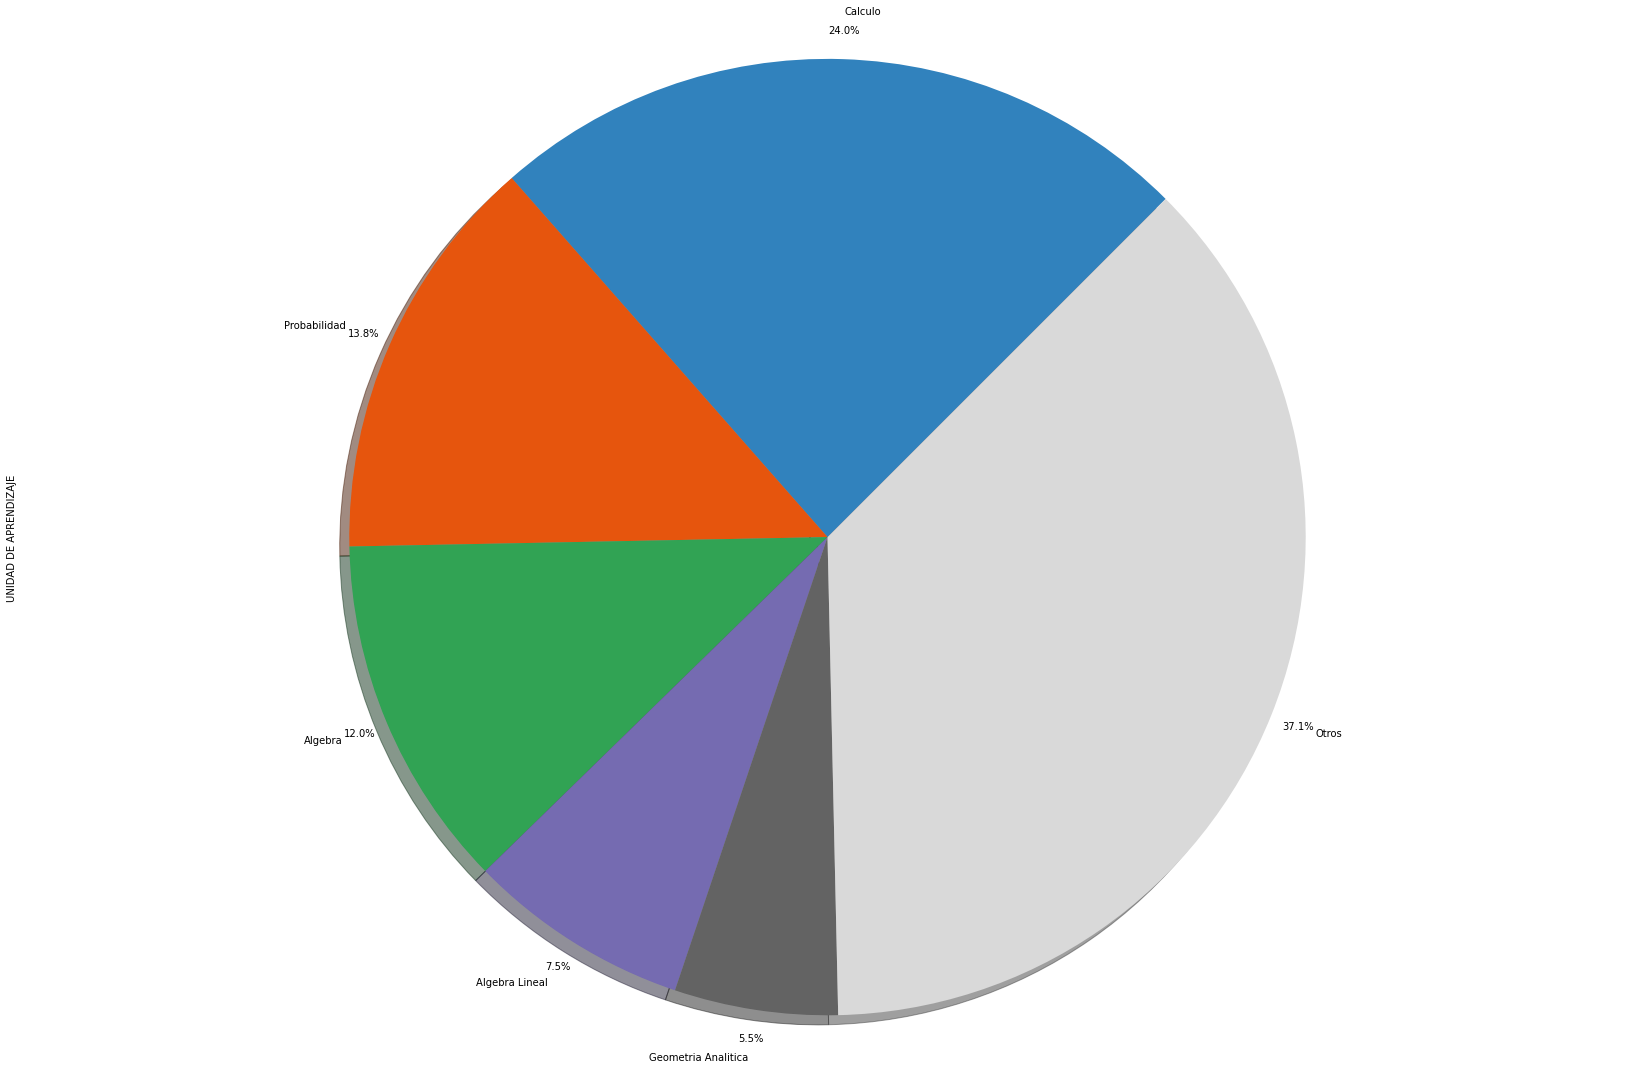

In [ ]:
B2019_I_UA.plot(kind = 'pie', #TIPO DE GRAFICO
                figsize = (23,15),
                autopct = '%1.1f%%', 
                startangle = 45, #INCLINACION DEL PASTEL
                shadow = True, #SOMBREADO
                subplots = True, #SUBGRAFICOS
                legend = False, #NO LEYENDA
                pctdistance = 1.06, 
                colormap = 'tab20c') #COLOR, PARA VER QUE COLORES HAY VER LA PAGINA QUE DEJE EN LINK)
plt.axis('equal')
plt.tight_layout()

### $2019-II$

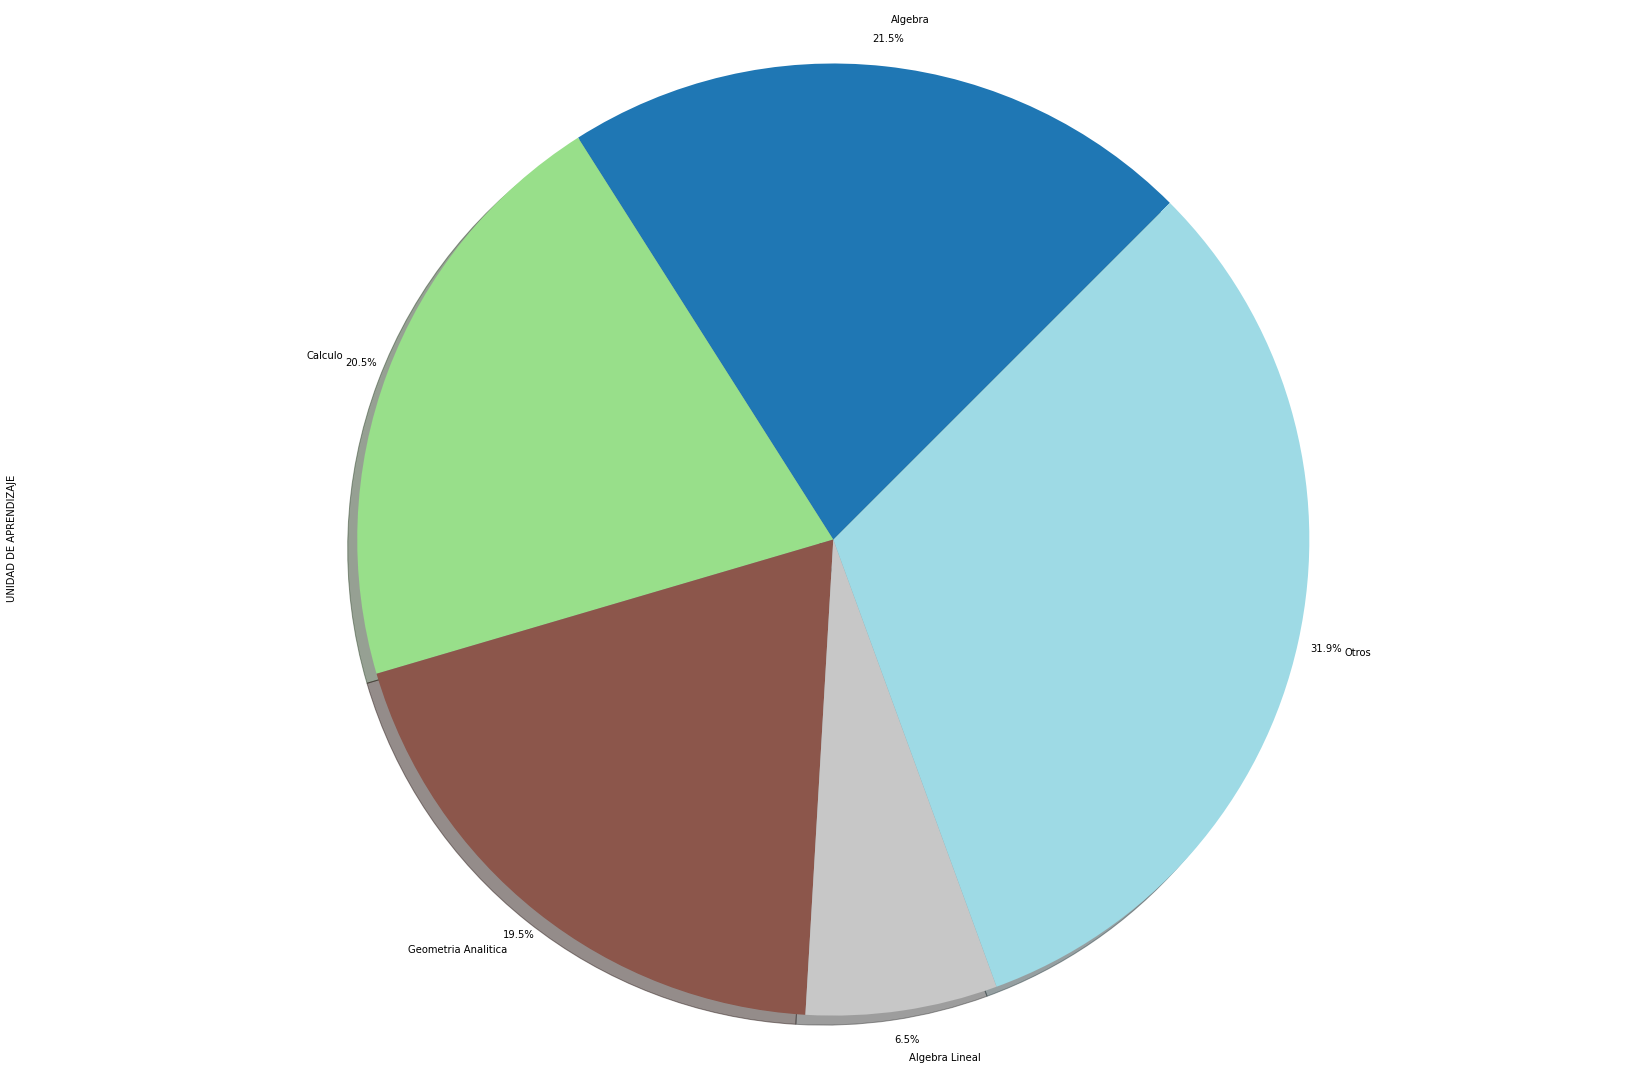

In [ ]:
B2019_II_UA.plot(kind = 'pie', #TIPO DE GRAFICO
                figsize = (23,15),
                autopct = '%1.1f%%', 
                startangle = 45, #INCLINACION DEL PASTEL
                shadow = True, #SOMBREADO
                subplots = True, #SUBGRAFICOS
                legend = False, #NO LEYENDA
                pctdistance = 1.06, 
                colormap = 'tab20', #COLOR, PARA VER QUE COLORES HAY VER LA PAGINA QUE DEJE EN LINK
)
plt.axis('equal')
plt.tight_layout()

### $2020-I$

In [ ]:
B2020_I_UA

,Unidad de Aprendizaje
Calculo,208
Algebra,98
Programacion,79
Topicos de Algebra,66
Probabilidad,45
Otros,430


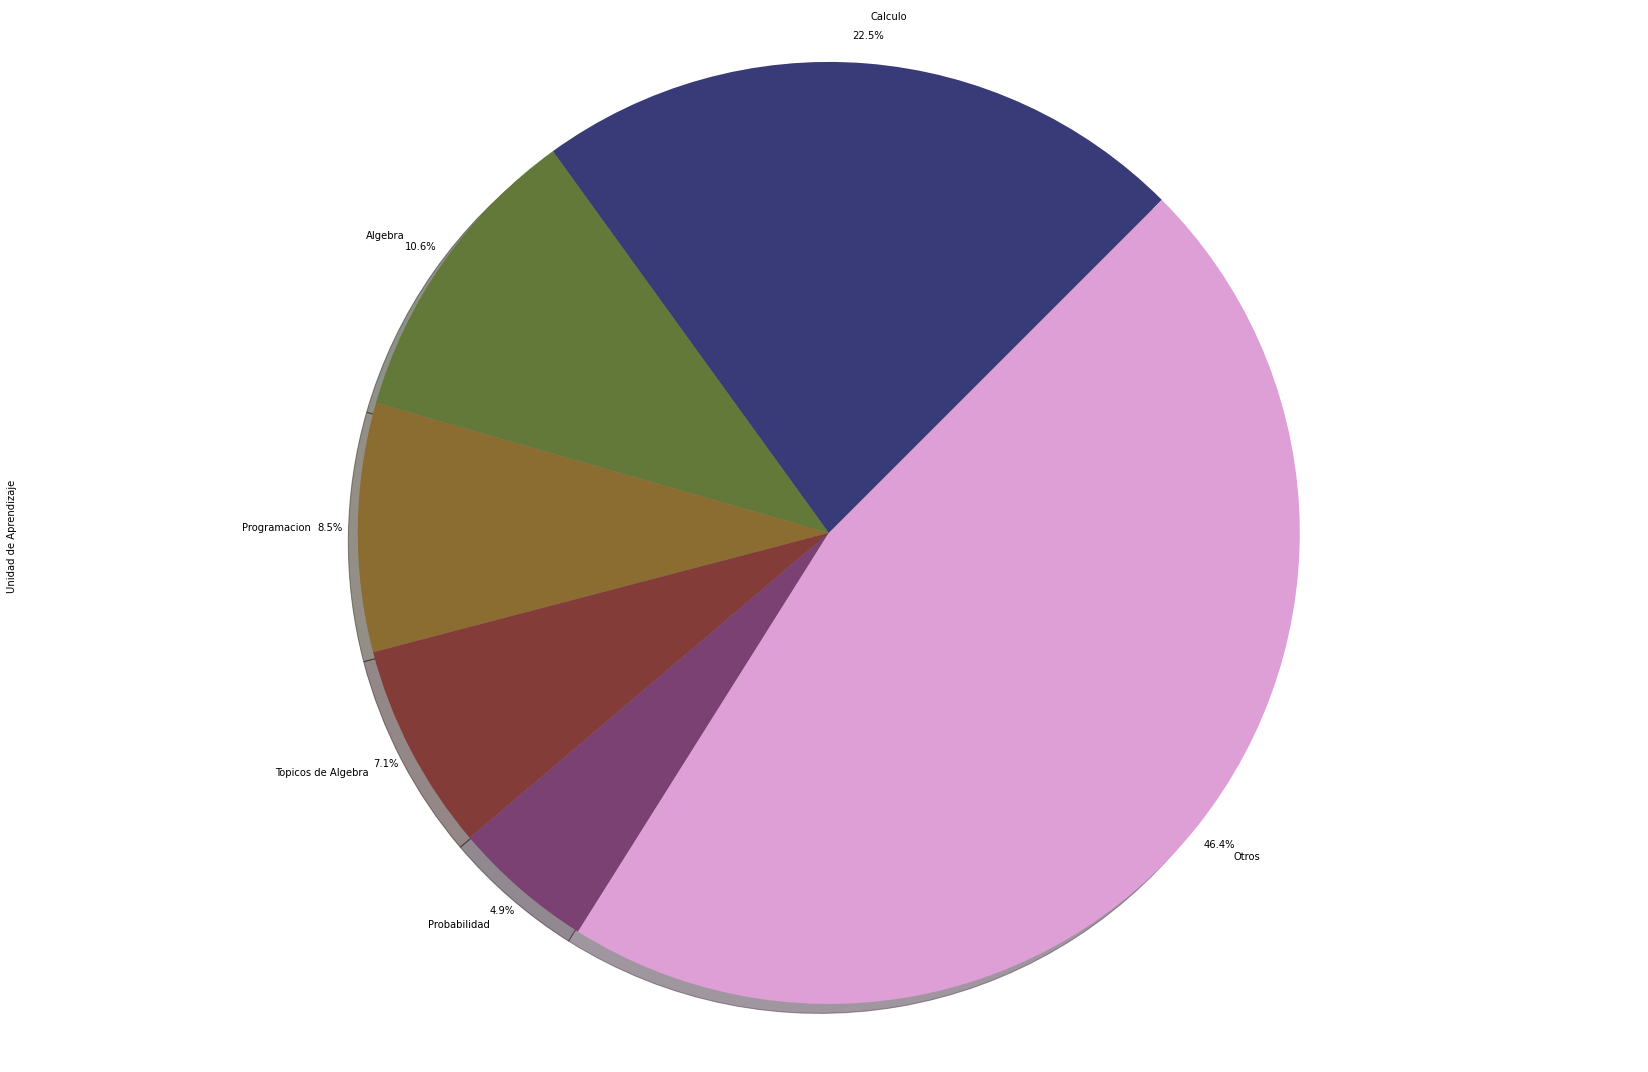

In [ ]:
B2020_I_UA.plot(kind = 'pie', #TIPO DE GRAFICO
                figsize = (23,15),
                autopct = '%1.1f%%', 
                startangle = 45, #INCLINACION DEL PASTEL
                shadow = True, #SOMBREADO
                subplots = True, #SUBGRAFICOS
                legend = False, #NO LEYENDA
                pctdistance = 1.06, 
                colormap = 'tab20b', #COLOR, PARA VER QUE COLORES HAY VER LA PAGINA QUE DEJE EN LINK
)
plt.axis('equal')
plt.tight_layout()

### $2020-II$

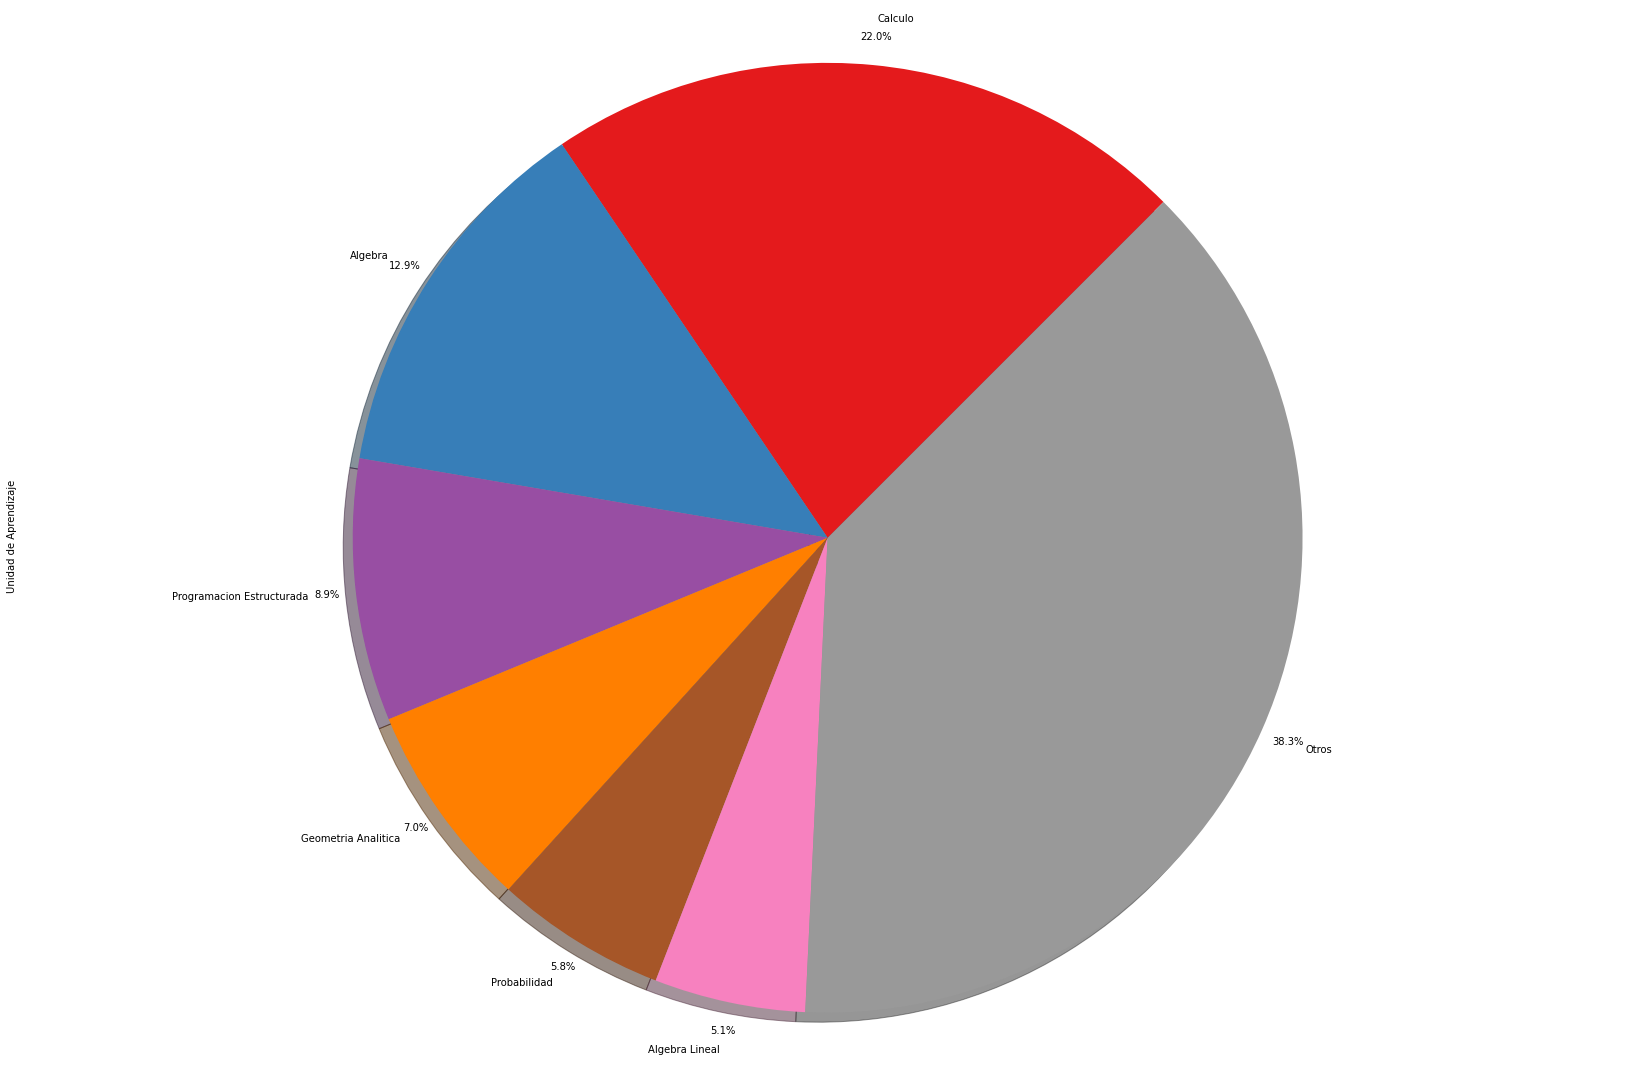

In [ ]:
B2020_II_UA.plot(kind = 'pie', #TIPO DE GRAFICO
                figsize = (23,15),
                autopct = '%1.1f%%', 
                startangle = 45, #INCLINACION DEL PASTEL
                shadow = True, #SOMBREADO
                subplots = True, #SUBGRAFICOS
                legend = False, #NO LEYENDA
                pctdistance = 1.06, 
                colormap = 'Set1', #COLOR, PARA VER QUE COLORES HAY VER LA PAGINA QUE DEJE EN LINK
)
plt.axis('equal')
plt.tight_layout()

### $2021-I$

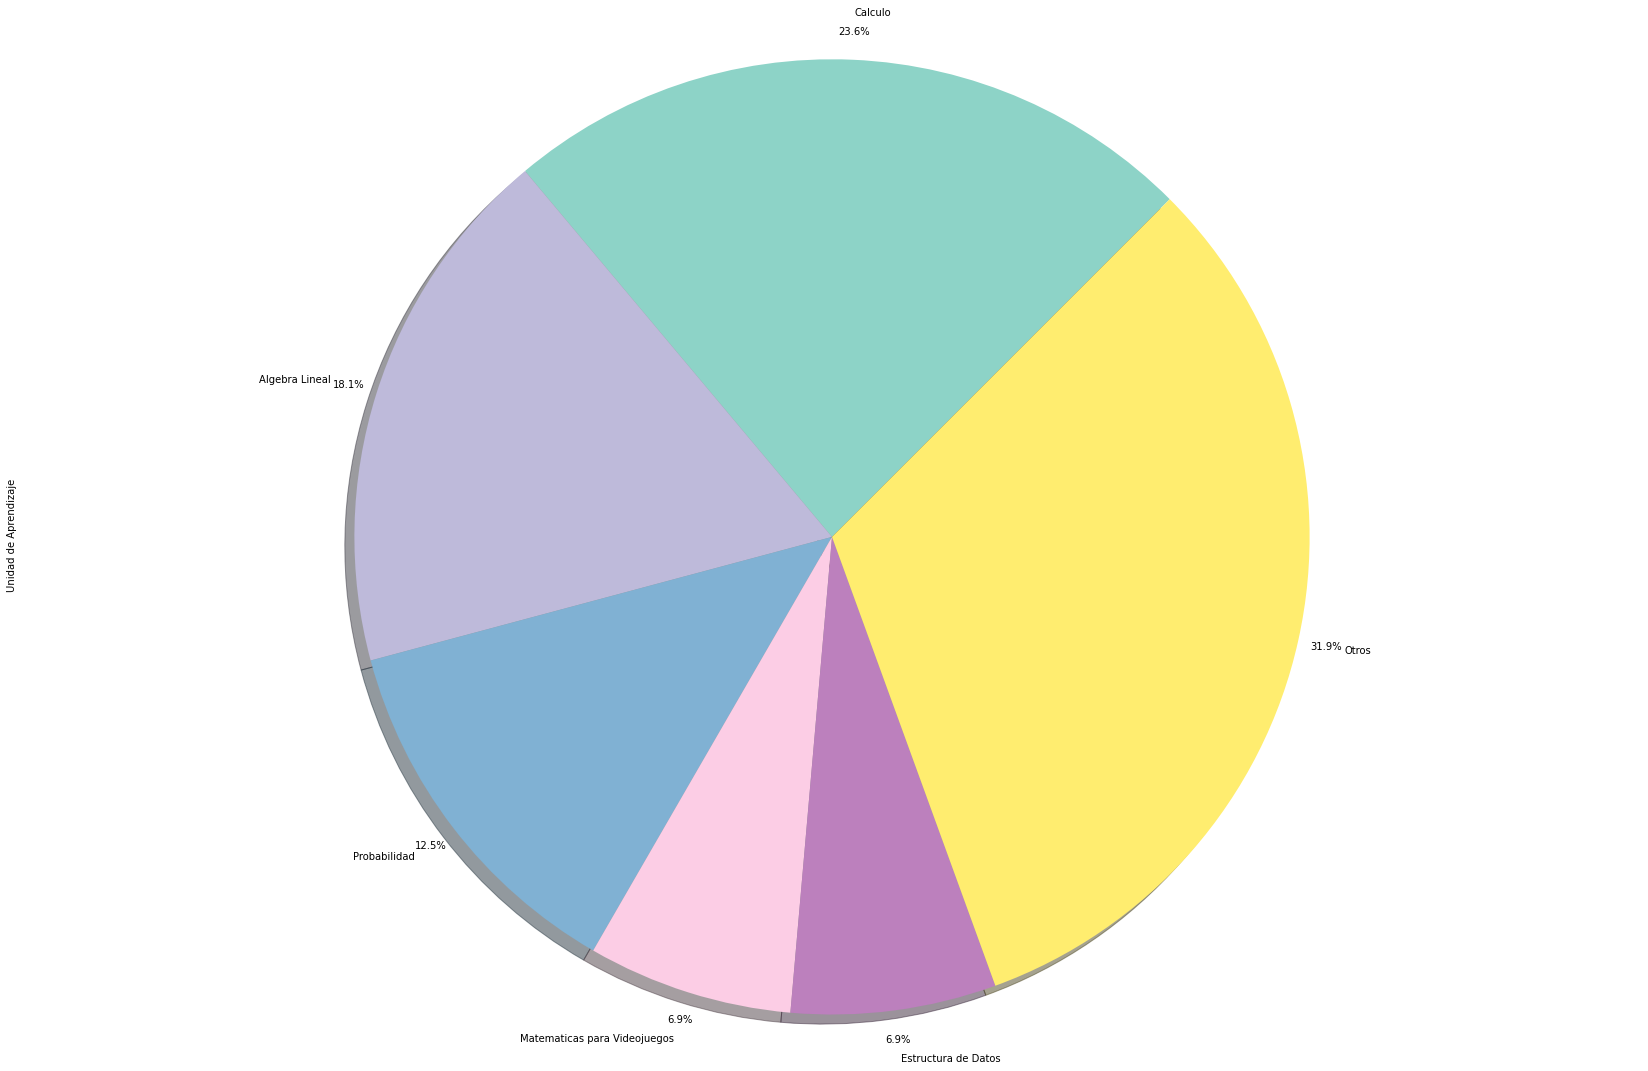

In [ ]:
B2021_I_UA.plot(kind = 'pie', #TIPO DE GRAFICO
                figsize = (23,15),
                autopct = '%1.1f%%', 
                startangle = 45, #INCLINACION DEL PASTEL
                shadow = True, #SOMBREADO
                subplots = True, #SUBGRAFICOS
                legend = False, #NO LEYENDA
                pctdistance = 1.06, 
                colormap = 'Set3', #COLOR, PARA VER QUE COLORES HAY VER LA PAGINA QUE DEJE EN LINK
)
plt.axis('equal')
plt.tight_layout()

### Conjunto de gráficos

In [ ]:
B2019_I_UA_P = B2019_I_UA.rename(columns={'UNIDAD DE APRENDIZAJE ':'2019-I'})
B2019_II_UA_P = B2019_II_UA.rename(columns={'UNIDAD DE APRENDIZAJE ':'2019-II'})
B2020_I_UA_P = B2020_I_UA.rename(columns = {'Unidad de Aprendizaje':'2020-I'})
B2020_II_UA_P = B2020_II_UA.rename(columns = {'Unidad de Aprendizaje':'2020-II'})
B2021_I_UA_P = B2021_I_UA.rename(columns = {'Unidad de Aprendizaje':'2021-I'})

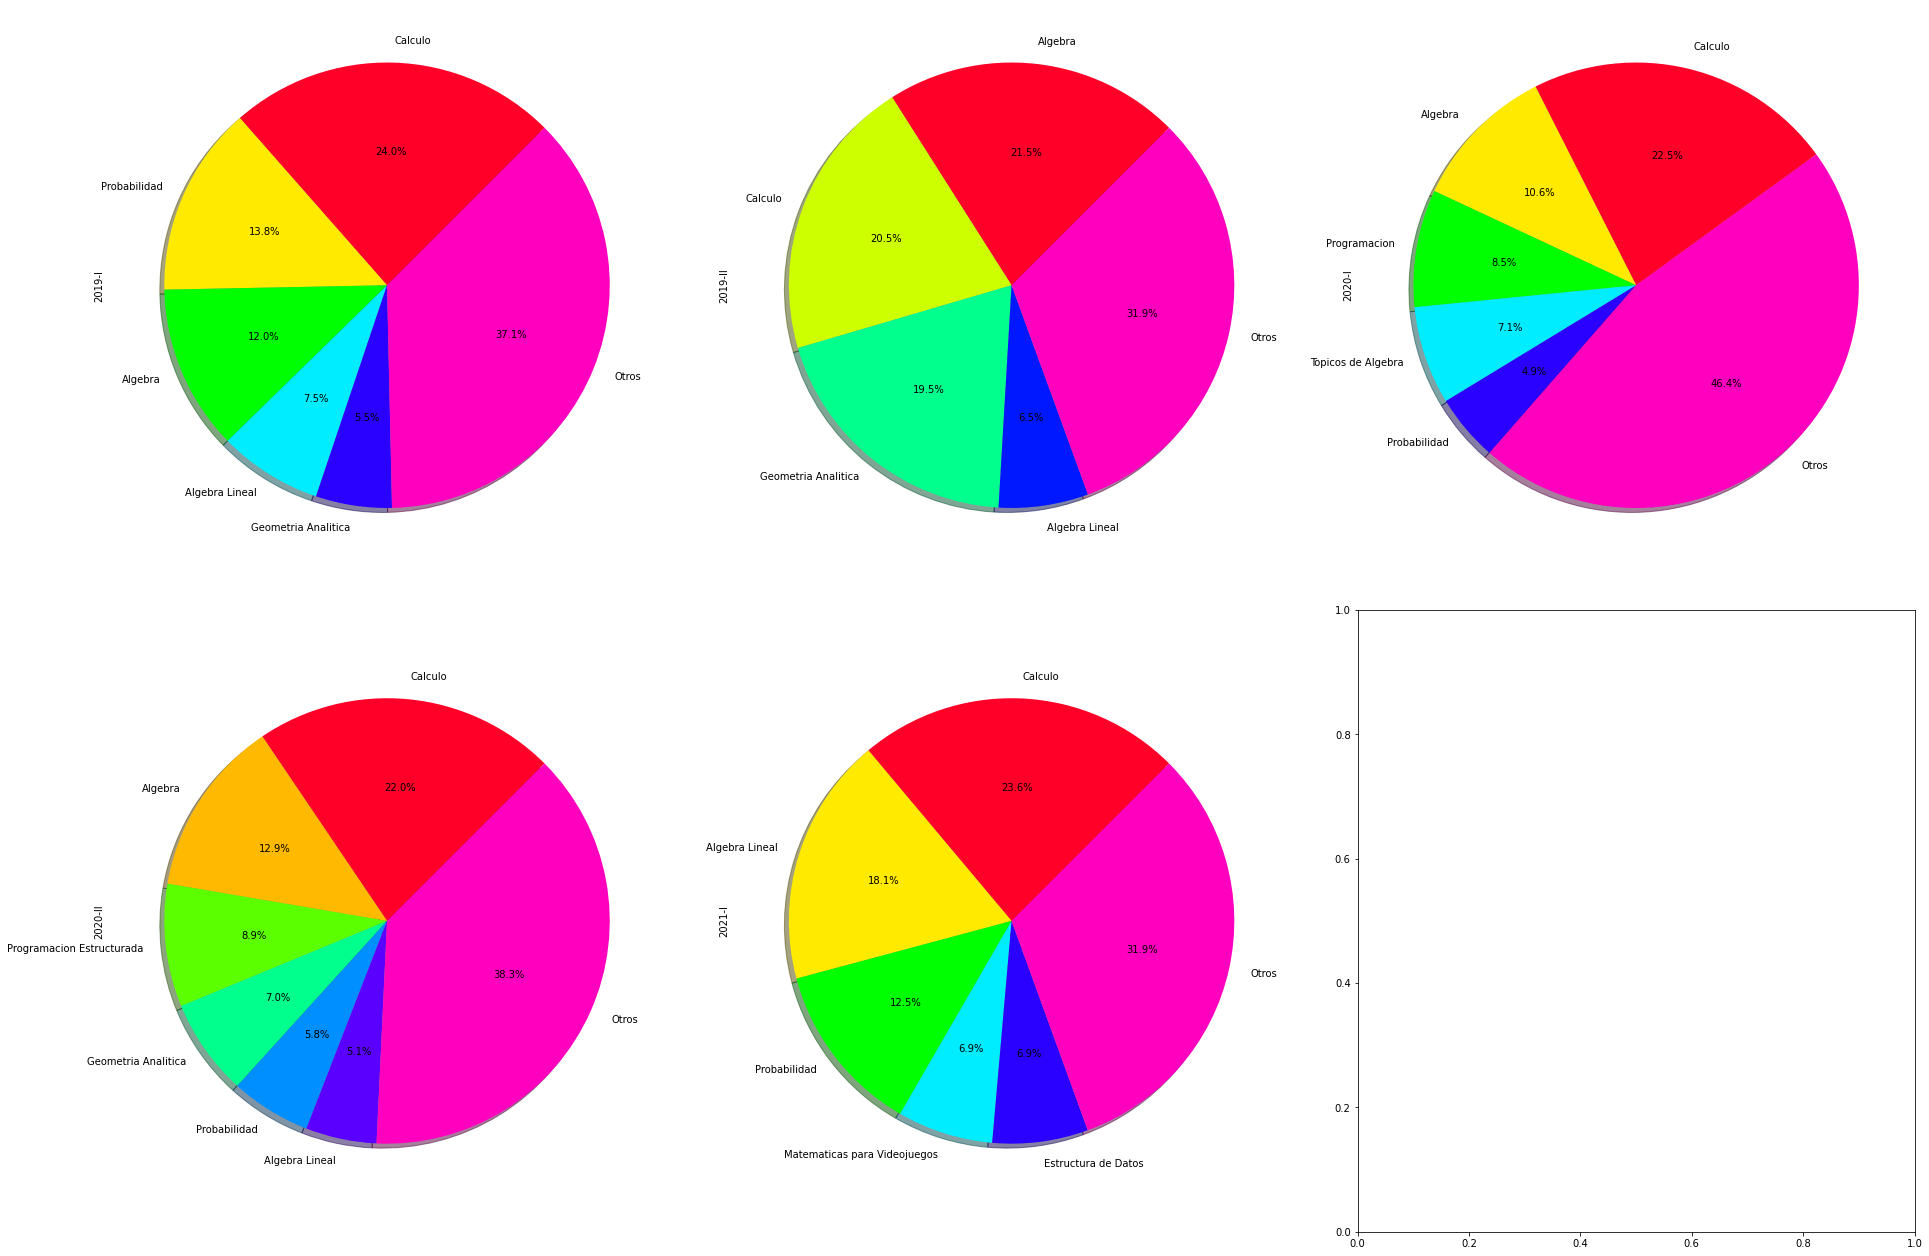

In [ ]:
fig, axes0 = plt.subplots(nrows=2, ncols=3,figsize = (27,18))
B2019_I_UA_P.plot(kind = 'pie', #TIPO DE GRAFICO
                autopct = '%1.1f%%', 
                startangle = 45, #INCLINACION DEL PASTEL
                shadow = True, #SOMBREADO
                subplots = True, #SUBGRAFICOS
                legend = False, #NO LEYENDA
                colormap = 'gist_rainbow', #COLOR, PARA VER QUE COLORES HAY VER LA PAGINA QUE DEJE EN LINK
                ax=axes0[0,0])
B2019_II_UA_P.plot(kind = 'pie', #TIPO DE GRAFICO
                autopct = '%1.1f%%', 
                startangle = 45, #INCLINACION DEL PASTEL
                shadow = True, #SOMBREADO
                subplots = True, #SUBGRAFICOS
                legend = False, #NO LEYENDA
                colormap = 'gist_rainbow', #COLOR, PARA VER QUE COLORES HAY VER LA PAGINA QUE DEJE EN LINK
                ax=axes0[0,1])
B2020_I_UA_P.plot(kind = 'pie', #TIPO DE GRAFICO
                autopct = '%1.1f%%', 
                startangle = 36, #INCLINACION DEL PASTEL
                shadow = True, #SOMBREADO
                subplots = True, #SUBGRAFICOS
                legend = False, #NO LEYENDA
                colormap = 'gist_rainbow', #COLOR, PARA VER QUE COLORES HAY VER LA PAGINA QUE DEJE EN LINK
                ax=axes0[0,2])
B2020_II_UA_P.plot(kind = 'pie', #TIPO DE GRAFICO
                autopct = '%1.1f%%', 
                startangle = 45, #INCLINACION DEL PASTEL
                shadow = True, #SOMBREADO
                subplots = True, #SUBGRAFICOS
                legend = False, #NO LEYENDA
                colormap = 'gist_rainbow', #COLOR, PARA VER QUE COLORES HAY VER LA PAGINA QUE DEJE EN LINK
                ax=axes0[1,0])
B2021_I_UA_P.plot(kind = 'pie', #TIPO DE GRAFICO
                autopct = '%1.1f%%', 
                startangle = 45, #INCLINACION DEL PASTEL
                shadow = True, #SOMBREADO
                subplots = True, #SUBGRAFICOS
                legend = False, #NO LEYENDA
                colormap = 'gist_rainbow', #COLOR, PARA VER QUE COLORES HAY VER LA PAGINA QUE DEJE EN LINK
                ax=axes0[1,1])
plt.tight_layout()
plt.savefig('Ej1.pdf',format = 'pdf')

## Gráficos de barras verticales

### $2019-I$

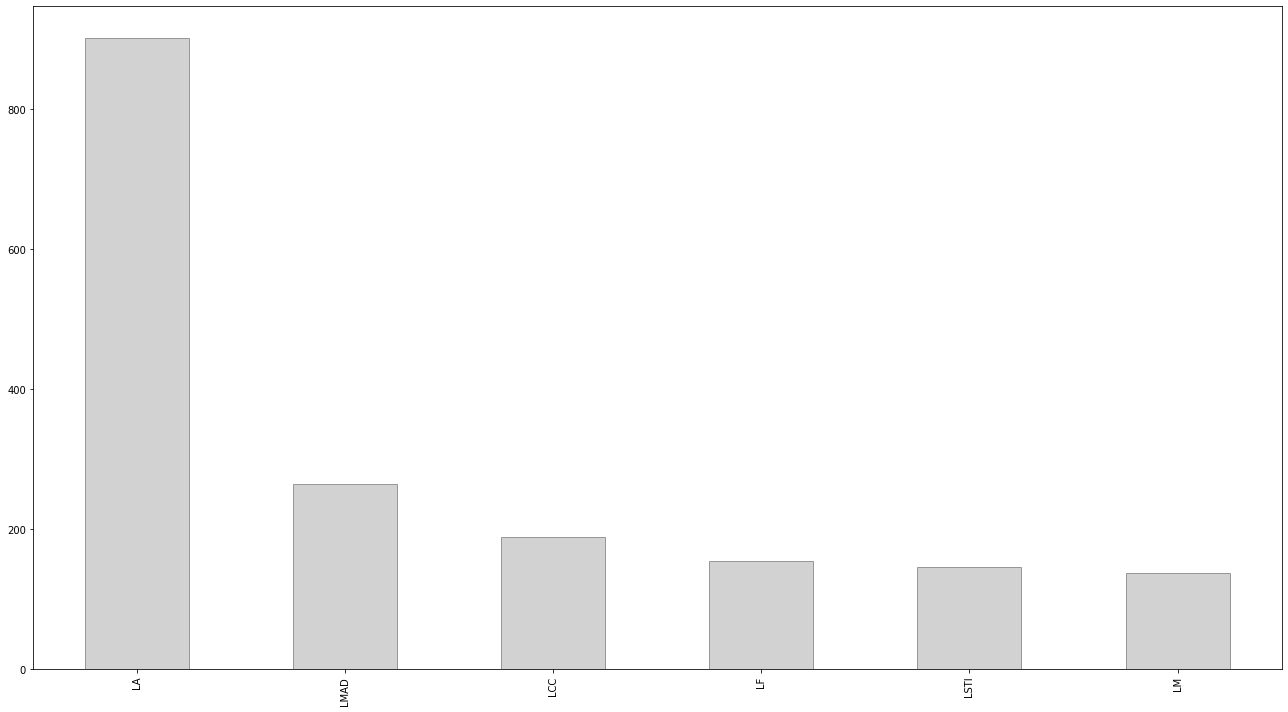

In [ ]:
B2019_Carrera_Total.plot(kind = 'bar',
                         legend = False,
                         figsize = (18,10),
                         color = 'gray',
                         edgecolor = 'black',
                         alpha = 0.35)
plt.tight_layout()

### $2019-II$

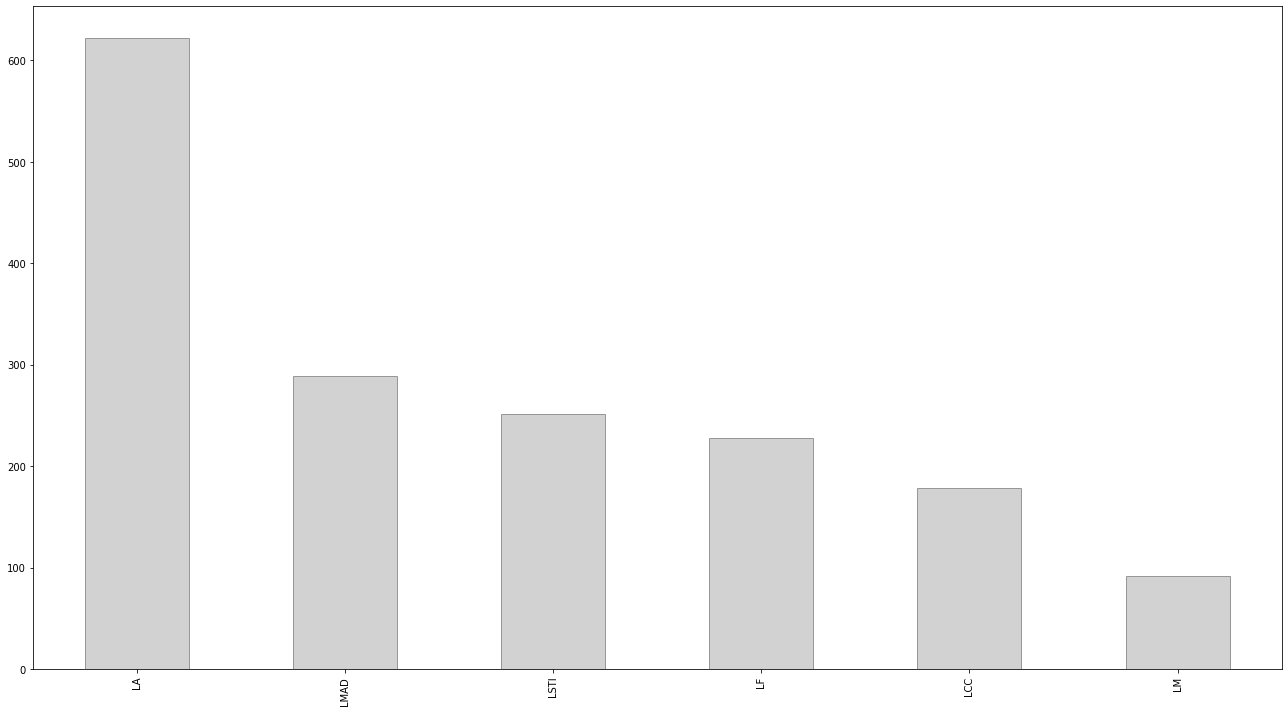

In [ ]:
B2019_II_Carrera_Total.plot(kind = 'bar',
                         legend = False,
                         figsize = (18,10),
                         color = 'gray',
                         edgecolor = 'black',
                         alpha = 0.35)
plt.tight_layout()

### $2020-I$

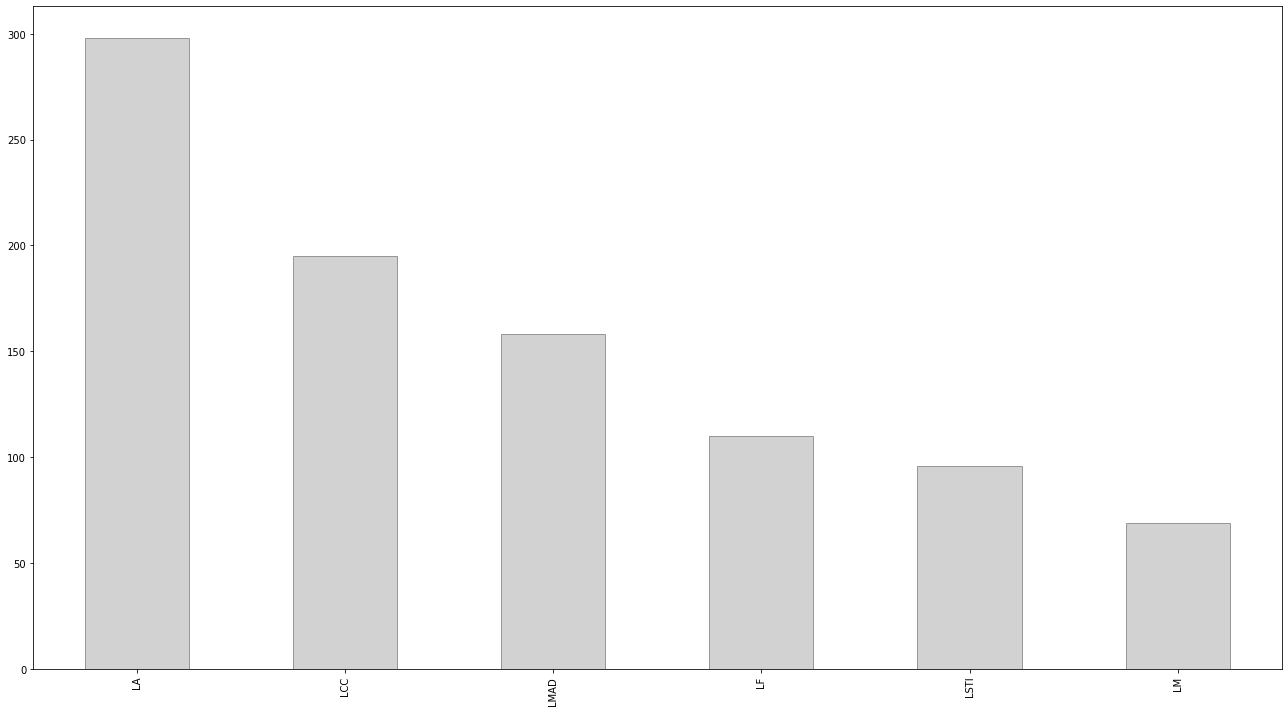

In [ ]:
B2020_I_Carrera_Total.plot(kind = 'bar',
                         legend = False,
                         figsize = (18,10),
                         color = 'gray',
                         edgecolor = 'black',
                         alpha = 0.35)
plt.tight_layout()

### $2020-II$

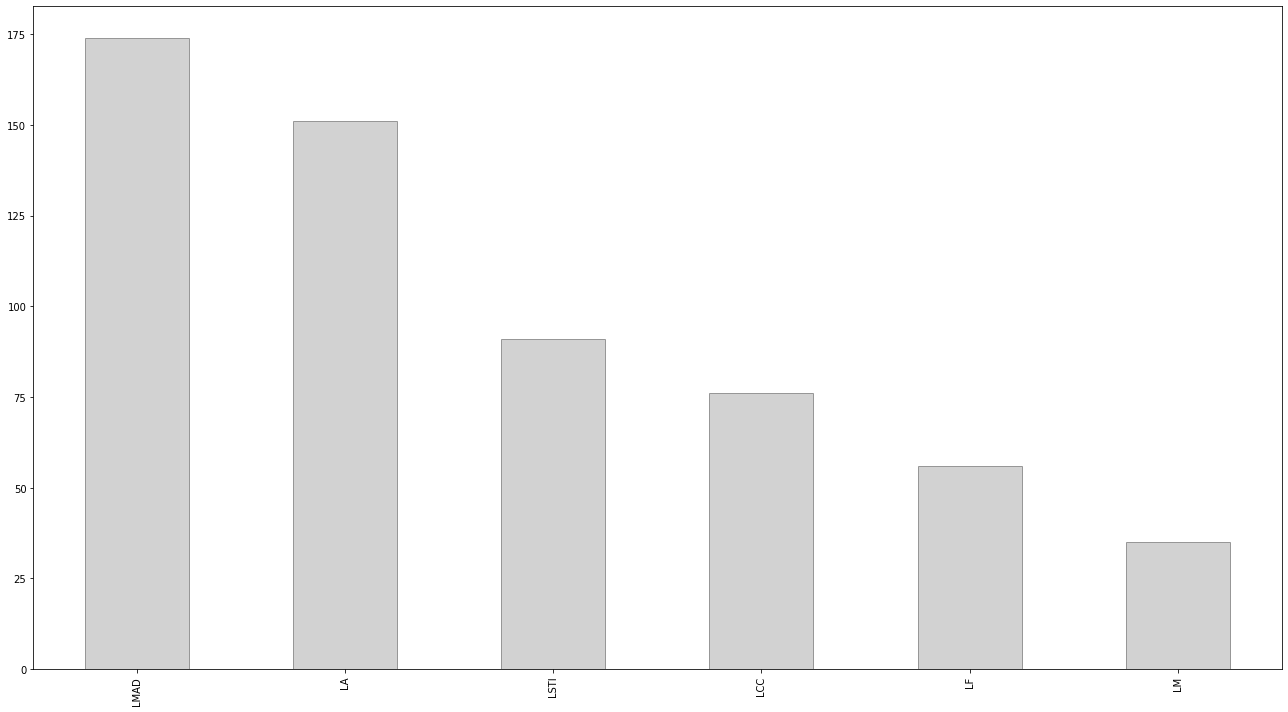

In [ ]:
B2020_II_Carrera_Total.plot(kind = 'bar',
                         legend = False,
                         figsize = (18,10),
                         color = 'gray',
                         edgecolor = 'black',
                         alpha = 0.35)
plt.tight_layout()

### $2021-I$

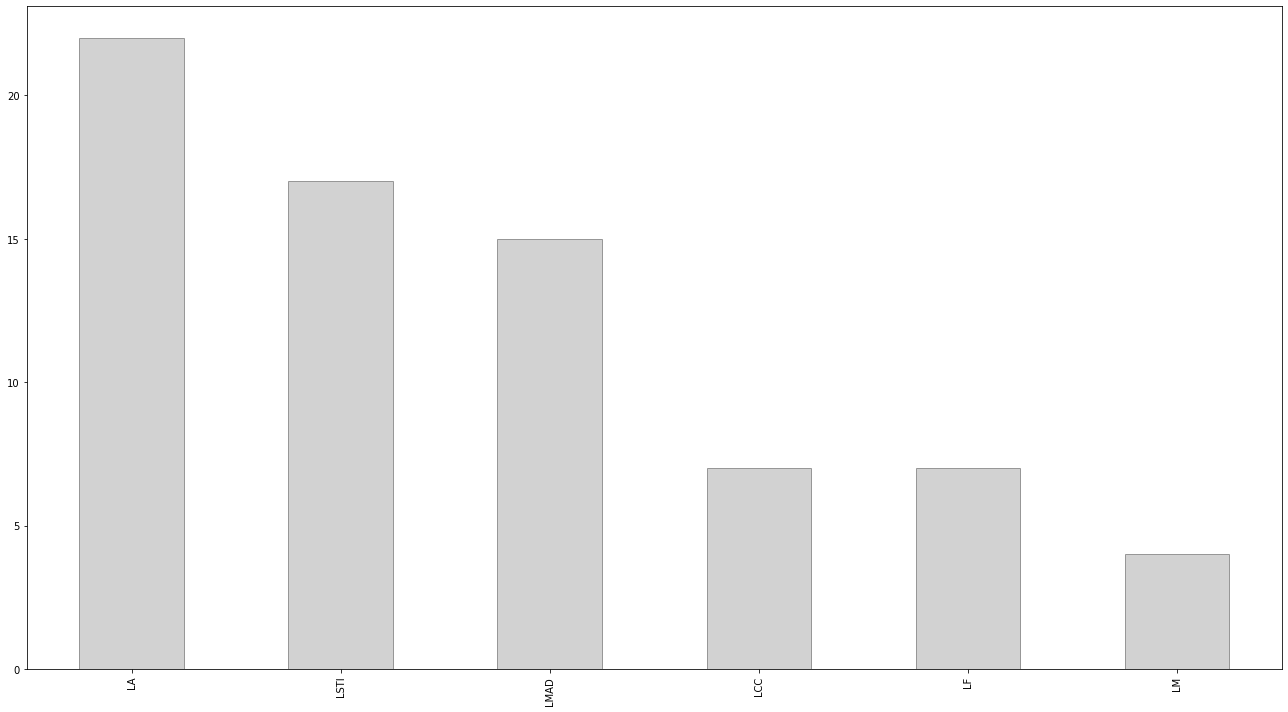

In [ ]:
 B2021_Carrera_Total.plot(kind = 'bar',
                         legend = False,
                         figsize = (18,10),
                         color = 'gray',
                         edgecolor = 'black',
                         alpha = 0.35)
plt.tight_layout()

### Conjunto de gráficos

In [ ]:
CGB0 = pd.concat([B2019_Carrera_Total,B2019_II_Carrera_Total],axis = 1)
CGB0.columns = ['2019-I','2019-II']
CGB1 = pd.concat([B2020_I_Carrera_Total,B2020_II_Carrera_Total],axis = 1)
CGB1.columns = ['2020-I','2020-II']
CGB2 = pd.concat([CGB0,CGB1],axis = 1)
CGB3 = pd.concat([CGB2,B2021_Carrera_Total],axis = 1)
CGB3.rename(columns = {'Carrera':'2021-I'},inplace = True)

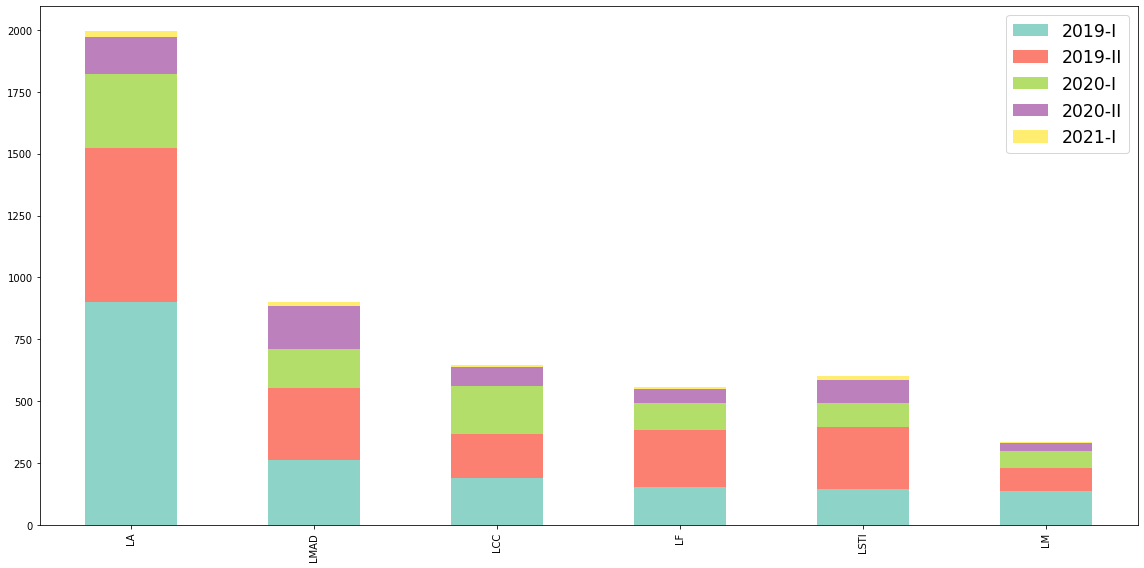

In [ ]:
CGB3.plot(kind = 'bar',stacked = True,figsize = (16,8),colormap = 'Set3')
plt.legend(fontsize = 'xx-large')
plt.tight_layout()
plt.savefig('Ej2.pdf',format = 'pdf')

## Gráficos de barras horizontales

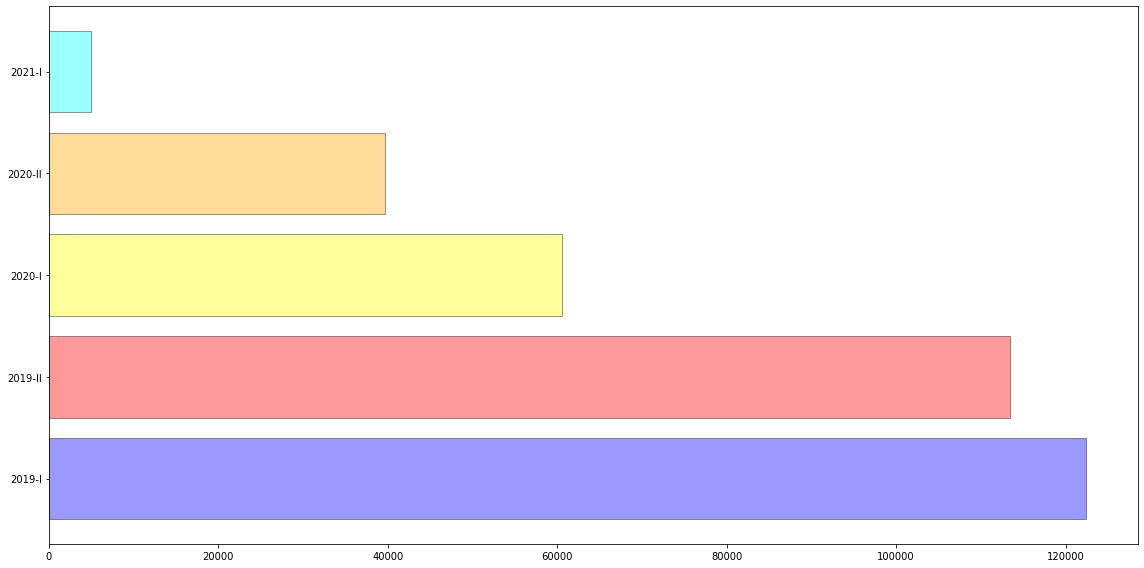

In [ ]:
plt.figure(figsize = (16,8))
plt.barh(['2019-I',
         '2019-II',
         '2020-I',
         '2020-II',
         '2021-I'],
        [B2019_I_Total_Tiempo,
        B2019_II_Total_Tiempo,
        B2020_I_Total_Tiempo,
        B2020_II_Total_Tiempo,
        B2021_I_Total_Tiempo],
         color = ['blue','red','yellow','orange','cyan'],
         edgecolor = 'black',
         alpha = 0.40)
plt.tight_layout()
plt.savefig('Ej3.pdf',format = 'pdf')

## Histogramas de frecuencias

### $2019-I$

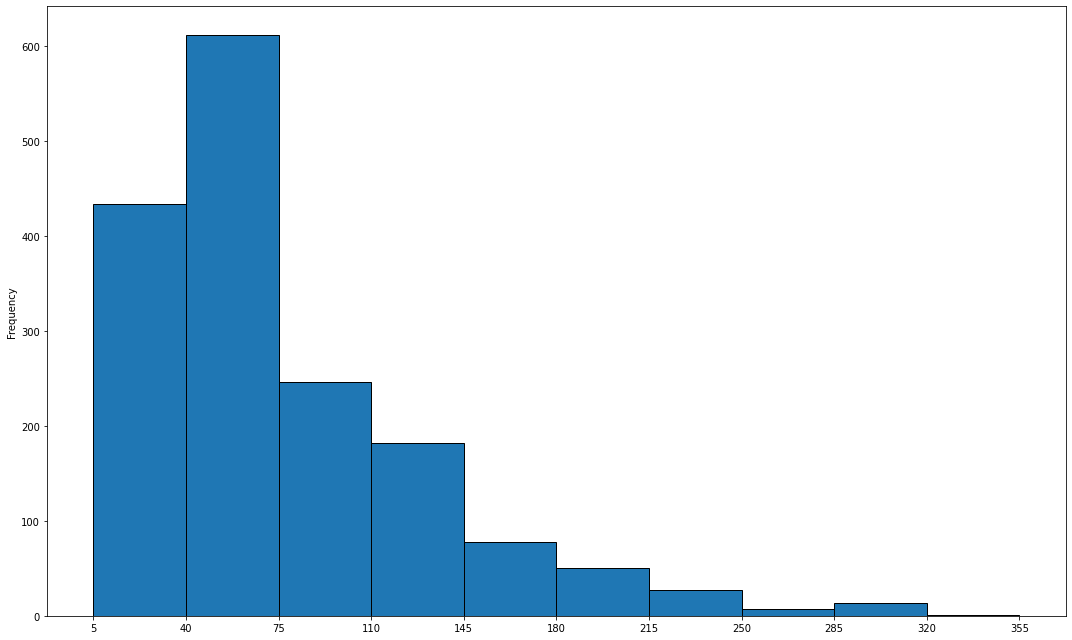

In [ ]:
c, xtick_2019_I = np.histogram(B2019_I_Hist_Tiempo) #ESTA FUNCION NOS AYUDA A MOSTRAR LOS VALORES EXACTOS EN CADA INTERVALO MOSTRADO EN EL GRAFICO
B2019_I_Hist_Tiempo.plot(kind = 'hist', 
                         edgecolor = 'black', #ORILLAS NEGRAS
                         xticks = xtick_2019_I, #INTERVALOS DEL GRAFICO
                         figsize = (15,9)) #LARGO Y ALTO DEL GRAFICO
plt.tight_layout()

### $2019-II$

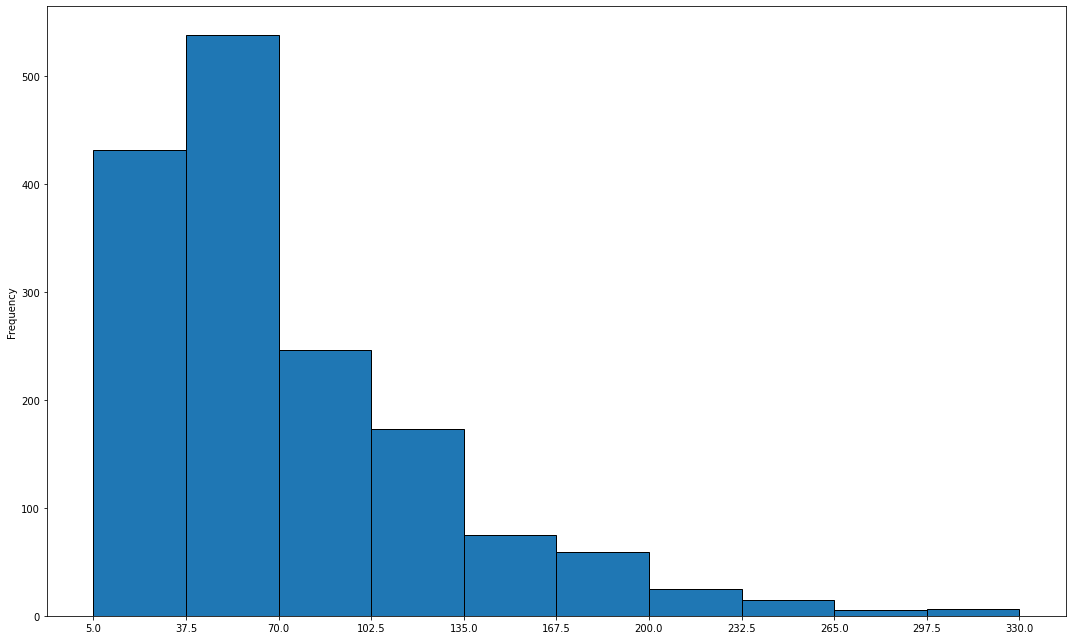

In [ ]:
c, xtick_2019_II = np.histogram(B2019_II_Hist_Tiempo) #ESTA FUNCION NOS AYUDA A MOSTRAR LOS VALORES EXACTOS EN CADA INTERVALO MOSTRADO EN EL GRAFICO
B2019_II_Hist_Tiempo.plot(kind = 'hist', 
                         edgecolor = 'black', #ORILLAS NEGRAS
                         xticks = xtick_2019_II, #INTERVALOS DEL GRAFICO
                         figsize = (15,9)) #LARGO Y ALTO DEL GRAFICO
plt.tight_layout()

### $2020-I$

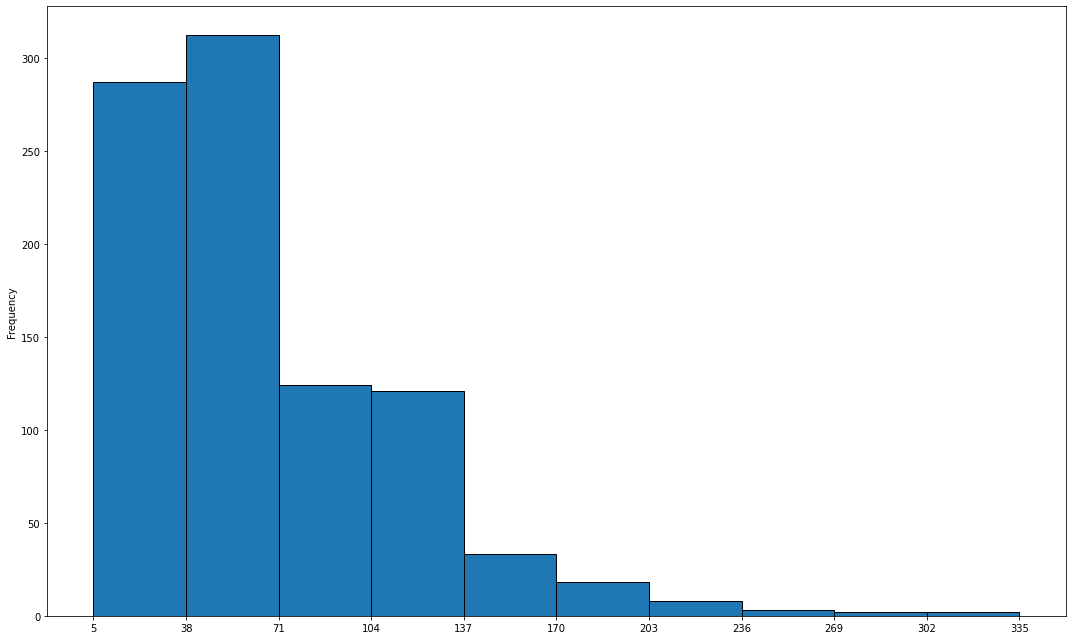

In [ ]:
c, xtick_2020_I = np.histogram(B2020_I_Hist_Tiempo) #ESTA FUNCION NOS AYUDA A MOSTRAR LOS VALORES EXACTOS EN CADA INTERVALO MOSTRADO EN EL GRAFICO
B2020_I_Hist_Tiempo.plot(kind = 'hist', 
                         edgecolor = 'black', #ORILLAS NEGRAS
                         xticks = xtick_2020_I, #INTERVALOS DEL GRAFICO
                         figsize = (15,9)) #LARGO Y ALTO DEL GRAFICO
plt.tight_layout()

### $2020-II$

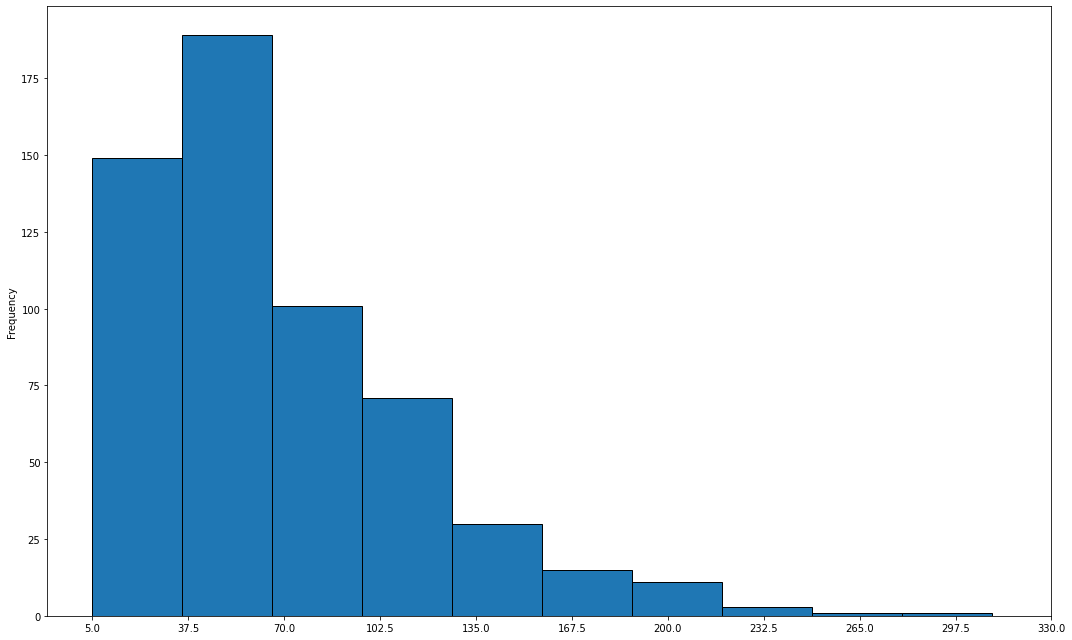

In [ ]:
c, xtick_2020_II = np.histogram(B2020_II_Hist_Tiempo) #ESTA FUNCION NOS AYUDA A MOSTRAR LOS VALORES EXACTOS EN CADA INTERVALO MOSTRADO EN EL GRAFICO
B2020_II_Hist_Tiempo.plot(kind = 'hist', 
                         edgecolor = 'black', #ORILLAS NEGRAS
                         xticks = xtick_2019_II, #INTERVALOS DEL GRAFICO
                         figsize = (15,9)) #LARGO Y ALTO DEL GRAFICO
plt.tight_layout()

### $2021-I$

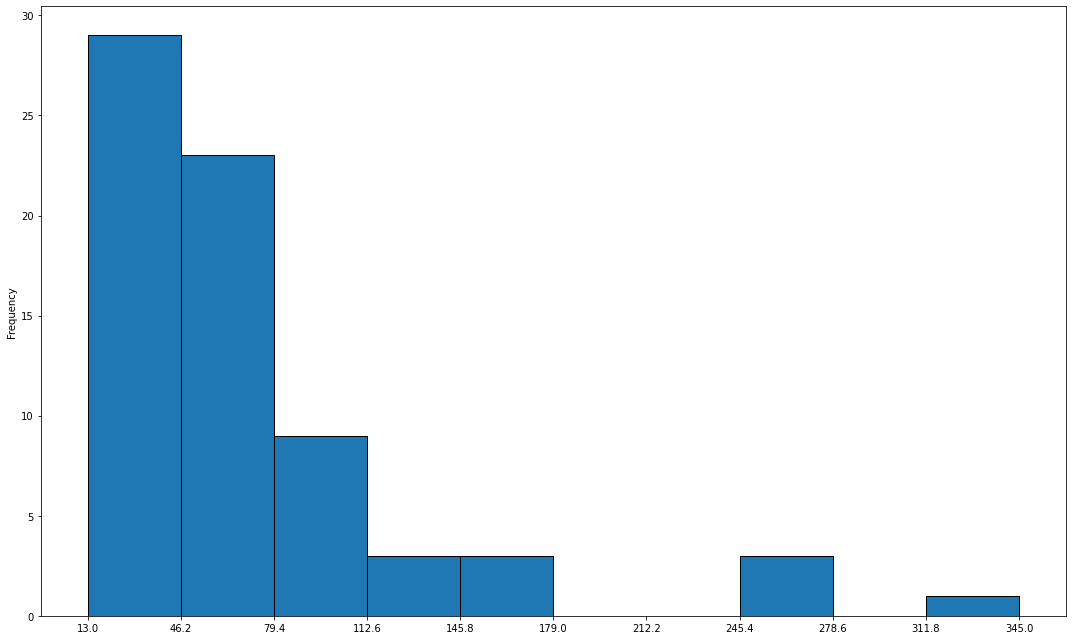

In [ ]:
c, xtick_2021_I = np.histogram(B2021_I_Hist_Tiempo) #ESTA FUNCION NOS AYUDA A MOSTRAR LOS VALORES EXACTOS EN CADA INTERVALO MOSTRADO EN EL GRAFICO
B2021_I_Hist_Tiempo.plot(kind = 'hist', 
                         edgecolor = 'black', #ORILLAS NEGRAS
                         xticks = xtick_2021_I, #INTERVALOS DEL GRAFICO
                         figsize = (15,9)) #LARGO Y ALTO DEL GRAFICO
plt.tight_layout()

### Media de los datos agrupados

La siguiente función nos ayuda a calcular la media de los datos agrupados

In [ ]:
def mean_da (Frecuencia,Marca_Clase):
  '''
  Frecuencia : Es la columna del Data Frame de los datos agrupados que contiene la frecuencia del intervalo

  Marca_Clase : Es la columna del Data Frame de los datos agrupados que contiene la marca de clase del intervalo
  '''
  Media = 0
  for i in range (len(Frecuencia)):
    Media += Frecuencia.iloc[i]*Marca_Clase.iloc[i]
  return Media/sum(Frecuencia)

Vamos a generar la tabla de frecuencia de cada una de las bases con enfoque en el tiempo

In [ ]:
Hist0 = pd.cut(B2019_I_Hist_Tiempo,bins = 10)
Hist1 = pd.cut(B2019_II_Hist_Tiempo,bins = 10)
Hist2 = pd.cut(B2020_I_Hist_Tiempo,bins = 10)
Hist3 = pd.cut(B2020_II_Hist_Tiempo,bins = 10)
Hist4 = pd.cut(B2021_I_Hist_Tiempo,bins = 10)

In [ ]:
TF0 = Hist0.to_frame().groupby('TIEMPO (MIN)').agg(frequency=("TIEMPO (MIN)", "count"))
TF1 = Hist1.to_frame().groupby('TIEMPO (MIN)').agg(frequency=("TIEMPO (MIN)", "count"))
TF2 = Hist2.to_frame().groupby('TIEMPO (MIN)').agg(frequency=("TIEMPO (MIN)", "count"))
TF3 = Hist3.to_frame().groupby('TIEMPO_(MIN)').agg(frequency=("TIEMPO_(MIN)", "count"))
TF4 = Hist4.to_frame().groupby('TIEMPO (MIN)').agg(frequency=("TIEMPO (MIN)", "count"))

In [ ]:
TF0['Marca de Clase'] = list( (Intervalo0.left+Intervalo0.right)/2 for Intervalo0 in list(TF0.index))
TF1['Marca de Clase'] = list( (Intervalo1.left+Intervalo1.right)/2 for Intervalo1 in list(TF1.index))
TF2['Marca de Clase'] = list( (Intervalo2.left+Intervalo2.right)/2 for Intervalo2 in list(TF2.index))
TF3['Marca de Clase'] = list( (Intervalo3.left+Intervalo3.right)/2 for Intervalo3 in list(TF3.index))
TF4['Marca de Clase'] = list( (Intervalo4.left+Intervalo4.right)/2 for Intervalo4 in list(TF4.index))

### Conjunto de gráficos

In [ ]:
#mean_da(TF0.loc[:,'frequency'],TF0.loc[:,'Marca de Clase']) #2019-I
#mean_da(TF1.loc[:,'frequency'],TF1.loc[:,'Marca de Clase']) #2019-II
#mean_da(TF2.loc[:,'frequency'],TF2.loc[:,'Marca de Clase']) #2020-I
#mean_da(TF3.loc[:,'frequency'],TF3.loc[:,'Marca de Clase']) #2020-II
#mean_da(TF4.loc[:,'frequency'],TF4.loc[:,'Marca de Clase']) #2021-I

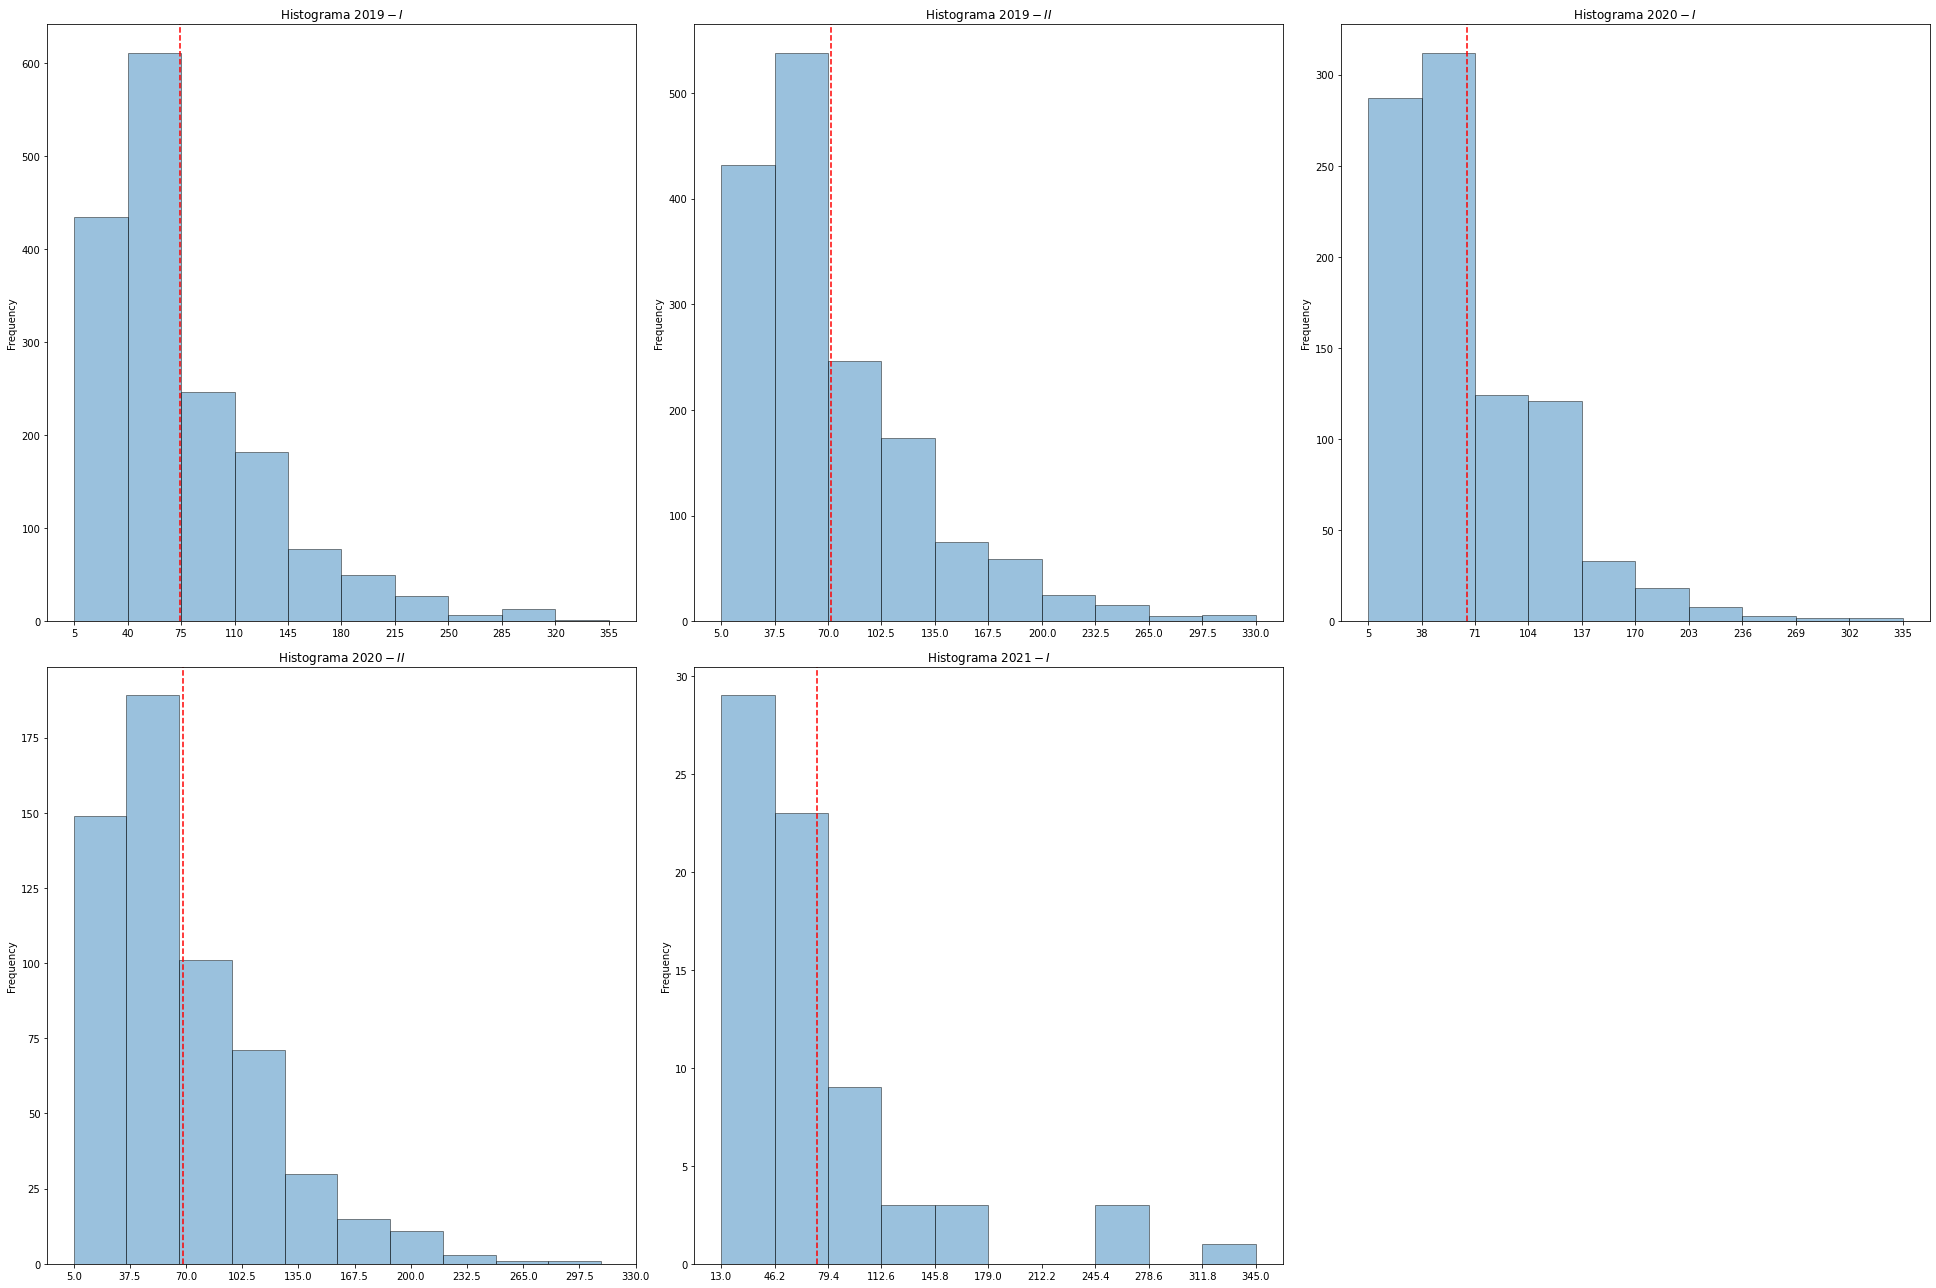

In [ ]:
plt.figure(figsize = (27,18))
plt.subplot(231)
c, xtick_2019_I = np.histogram(B2019_I_Hist_Tiempo)
B2019_I_Hist_Tiempo.plot(kind = 'hist', 
                         edgecolor = 'black',
                         xticks = xtick_2019_I,
                         title = 'Histograma '+r'$2019-I$',
                         alpha = 0.45)
plt.axvline(x=mean_da(TF0.loc[:,'frequency'],TF0.loc[:,'Marca de Clase']), ymin=0, ymax=100,color = 'red',linestyle = '--')

plt.subplot(232)
c, xtick_2019_II = np.histogram(B2019_II_Hist_Tiempo)
B2019_II_Hist_Tiempo.plot(kind = 'hist', 
                         edgecolor = 'black', 
                         xticks = xtick_2019_II,
                         title = 'Histograma '+r'$2019 - II$',
                          alpha = 0.45) 
plt.axvline(x=mean_da(TF1.loc[:,'frequency'],TF1.loc[:,'Marca de Clase']),ymin=0,ymax=100,color = 'red',linestyle='--')

plt.subplot(233)
c, xtick_2020_I = np.histogram(B2020_I_Hist_Tiempo)
B2020_I_Hist_Tiempo.plot(kind = 'hist', 
                         edgecolor = 'black',
                         xticks = xtick_2020_I,
                         title = 'Histograma '+r'$2020 - I$',
                         alpha = 0.45)
plt.axvline(x=mean_da(TF2.loc[:,'frequency'],TF2.loc[:,'Marca de Clase']),ymin=0,ymax=100,color = 'red',linestyle='--')

plt.subplot(234)
c, xtick_2020_II = np.histogram(B2020_II_Hist_Tiempo) 
B2020_II_Hist_Tiempo.plot(kind = 'hist', 
                         edgecolor = 'black',
                         xticks = xtick_2019_II,
                         title = 'Histograma '+r'$2020 - II$',
                          alpha = 0.45)
plt.axvline(x=mean_da(TF3.loc[:,'frequency'],TF3.loc[:,'Marca de Clase']),ymin=0,ymax=100,color = 'red',linestyle='--')

plt.subplot(235)
c, xtick_2021_I = np.histogram(B2021_I_Hist_Tiempo) 
B2021_I_Hist_Tiempo.plot(kind = 'hist', 
                         edgecolor = 'black', 
                         xticks = xtick_2021_I,
                         title = 'Histograma '+r'$2021 - I$',
                         alpha = 0.45)
plt.axvline(x=mean_da(TF4.loc[:,'frequency'],TF4.loc[:,'Marca de Clase']),ymin=0,ymax=100,color = 'red',linestyle='--')
plt.tight_layout()
plt.savefig('Ej4.pdf',format = 'pdf')

# Tablas

## Tiempo promedio de asesoría

In [ ]:
Tabla_Tiempo_Promedio = pd.DataFrame({'Año-Semestre':['2019-I','2019-II','2020-I','2020-II','2021-I'],
                                      'Tiempo Promedio (Minutos)':[B2019_I_Promedio_Tiempo,
                                                                  B2019_II_Promedio_Tiempo,
                                                                  B2020_I_Promedio_Tiempo,
                                                                  B2020_II_Promedio_Tiempo,
                                                                  B2021_I_Promedio_Tiempo]})

In [ ]:
Tabla_Tiempo_Promedio

,Año-Semestre,Tiempo Promedio (Minutos)
0,2019-I,74.220740
1,2019-II,72.078780
2,2020-I,66.536264
3,2020-II,69.380035
4,2021-I,70.507042


## Tiempo total de asesoría

In [ ]:
Tabla_Tiempo_Total = pd.DataFrame({'Año-Semestre':['2019-I','2019-II','2020-I','2020-II','2021-I'],
                                   'Tiempo Total (Minutos)':[B2019_I_Total_Tiempo,
                                                             B2019_II_Total_Tiempo,
                                                             B2020_I_Total_Tiempo,
                                                             B2020_II_Total_Tiempo,
                                                             B2021_I_Total_Tiempo]})

In [ ]:
Tabla_Tiempo_Total

,Año-Semestre,Tiempo Total (Minutos)
0,2019-I,122390.0
1,2019-II,113452.0
2,2020-I,60548.0
3,2020-II,39616.0
4,2021-I,5006.0


## Total de alumnos por carrera

In [ ]:
CGB3

,2019-I,2019-II,2020-I,2020-II,2021-I
LA,902,622,298,151,22
LMAD,264,289,158,174,15
LCC,189,178,195,76,7
LF,155,228,110,56,7
LSTI,146,251,96,91,17
LM,137,92,69,35,4


#Análisis Extras

## Prueba de *Kolmogorov-Smirnov* a dos muestras

In [ ]:
!pip install scipy --upgrade

Requirement already up-to-date: scipy in /usr/local/lib/python3.7/dist-packages (1.6.3)


In [ ]:
from scipy.stats import ks_2samp

Tomaremos $\alpha = 0.05$

Vamos a comprobar que la distribución de tiempo en $2019-I$ con los demás semestres

In [ ]:
ks_2samp(B2019_I_Hist_Tiempo,B2019_II_Hist_Tiempo) #B2019-II

KstestResult(statistic=0.03145258417754243, pvalue=0.3920388759709117)

In [ ]:
ks_2samp(B2019_I_Hist_Tiempo,B2020_I_Hist_Tiempo) #B2020-I

KstestResult(statistic=0.07363570329003925, pvalue=0.0032417747506320316)

In [ ]:
ks_2samp(B2019_I_Hist_Tiempo,B2020_II_Hist_Tiempo) #B2020-II

KstestResult(statistic=0.05496086892337233, pvalue=0.1474356814368799)

In [ ]:
ks_2samp(B2019_I_Hist_Tiempo,B2021_I_Hist_Tiempo) #B2021-I

KstestResult(statistic=0.1658367427121858, pvalue=0.04174907270286199)

Comprobamos que la distribución de tiempo en $2019-II$ con los demás semestres

In [ ]:
ks_2samp(B2019_II_Hist_Tiempo,B2020_I_Hist_Tiempo) #B2020-I

KstestResult(statistic=0.051208511945487804, pvalue=0.09304723301223539)

In [ ]:
ks_2samp(B2019_II_Hist_Tiempo,B2020_II_Hist_Tiempo) #B2020-II

KstestResult(statistic=0.04685153000709872, pvalue=0.3049047492644066)

In [ ]:
ks_2samp(B2019_II_Hist_Tiempo,B2021_I_Hist_Tiempo) #B2021-I

KstestResult(statistic=0.13983392093347888, pvalue=0.12701459570050266)

Comprobamos que la distribución de tiempo en $2020-I$ con los demás semestres

In [ ]:
ks_2samp(B2020_I_Hist_Tiempo,B2020_II_Hist_Tiempo) #B2020-II

KstestResult(statistic=0.07100132791901619, pvalue=0.05471055335041397)

In [ ]:
ks_2samp(B2020_I_Hist_Tiempo,B2021_I_Hist_Tiempo) #B2021-I

KstestResult(statistic=0.09484599907135119, pvalue=0.5594913134182904)

Comprobamos que la distribución de tiempo en $2020-II$ con los demás semestres

In [ ]:
ks_2samp(B2020_II_Hist_Tiempo,B2021_I_Hist_Tiempo) #B2021-I

KstestResult(statistic=0.13095384918970918, pvalue=0.2080547181272211)

## Data Classification

In [ ]:
Data0 = B2019_I.loc[:,['CARRERA','UNIDAD DE APRENDIZAJE ','TIEMPO (MIN)']]
Data1 = B2019_II.loc[:,['CARRERA','UNIDAD DE APRENDIZAJE ','TIEMPO (MIN)']]
Data2 = B2020_I.loc[:,['Carrera','Unidad de Aprendizaje','TIEMPO (MIN)']]
Data3 = B2020_II.loc[:,['Carrera','Unidad de Aprendizaje','TIEMPO_(MIN)']]
Data4 = B2021_I.loc[:,['Carrera','Unidad de Aprendizaje','TIEMPO (MIN)']]

In [ ]:
Data0.rename(columns = {'UNIDAD DE APRENDIZAJE ':'UNIDAD DE APRENDIZAJE'},inplace = True)
Data1.rename(columns = {'UNIDAD DE APRENDIZAJE ':'UNIDAD DE APRENDIZAJE'},inplace = True)
Data2.rename(columns = {'Unidad de Aprendizaje':'UNIDAD DE APRENDIZAJE','Carrera':'CARRERA'},inplace = True)
Data3.rename(columns = {'Unidad de Aprendizaje':'UNIDAD DE APRENDIZAJE','Carrera':'CARRERA','TIEMPO_(MIN)':'TIEMPO (MIN)'},inplace = True)
Data4.rename(columns = {'Unidad de Aprendizaje':'UNIDAD DE APRENDIZAJE','Carrera':'CARRERA'},inplace = True)

In [ ]:
Data = pd.concat([Data0,Data1],ignore_index = True)
Data = pd.concat([Data,Data2],ignore_index= True)
Data = pd.concat([Data,Data3],ignore_index=True)
Data = pd.concat([Data,Data4],ignore_index=True)
Data

,CARRERA,UNIDAD DE APRENDIZAJE,TIEMPO (MIN)
0,LA,Probabilidad,31.0
1,LA,Probabilidad,31.0
2,LA,Algebra,51.0
3,LMAD,Algebra,51.0
4,LMAD,Algebra,51.0
...,...,...,...
5029,LA,Calculo,25.0
5030,LSTI,Matematicas Discretas,15.0
5031,LA,Metodologia de la Programacion,35.0
5032,LMAD,Programacion Estructurada,152.0


Nos interesa estimar que dado el tiempo de asesoría y si pide un estudiante 'Probabilidad' sea estudiante de Actuaría

Como tenemos variables cualitativas en las columnas de 'CARRERA' y 'UNIDAD DE APRENDIZAJE' los volvemos binarias y los agrupamos en un solo Data Frame

In [ ]:
DC = pd.concat([pd.get_dummies(Data.loc[:,'CARRERA']).loc[:,'LA'].to_frame(),pd.get_dummies(Data.loc[:,'UNIDAD DE APRENDIZAJE']).loc[:,'Probabilidad'].to_frame()],axis = 1,ignore_index=True)
DC = pd.concat([ DC,Data.loc[:,'TIEMPO (MIN)'] ],axis = 1,ignore_index = True)
DC.columns = ['LA','Probabilidad','TIEMPO (MIN)']

In [ ]:
DC

,LA,Probabilidad,TIEMPO (MIN)
0,1,1,31.0
1,1,1,31.0
2,1,0,51.0
3,0,0,51.0
4,0,0,51.0
...,...,...,...
5029,1,0,25.0
5030,0,0,15.0
5031,1,0,35.0
5032,0,0,152.0


In [ ]:
DC.dropna(inplace=True)

In [ ]:
X_ = DC[['TIEMPO (MIN)','Probabilidad']]
Y_ = DC['LA']

In [ ]:
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /usr/local/lib/python3.7/dist-packages (0.0)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Vamos asignar el $30\%$ de los datos a las pruebas

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_,Y_,test_size = 0.3)

Crearemos una variable llamada 'vecinos' para ir incrementando el número de vecinos a estudiar y su exactitud, iremos desde 1 hasta 100 vecinos

In [ ]:
vecinos = list(range(1,101))

In [ ]:
train_exactitud = np.empty(len(vecinos))
test_exactitud = np.empty(len(vecinos))

Creamos el ciclo for que nos ayuda a entrenar el modelo en cada iteracion en función

In [ ]:
for it1, it2 in enumerate(vecinos):
  knn = KNeighborsClassifier(n_neighbors=it2)
  knn.fit(X_train,Y_train)
  train_exactitud[it1] = knn.score(X_train,Y_train)
  test_exactitud[it1] = knn.score(X_test,Y_test)

Graficamos

In [ ]:
grafo = pd.DataFrame({'Test Exactitud':list(test_exactitud),'Entrenamiento':list(train_exactitud)})

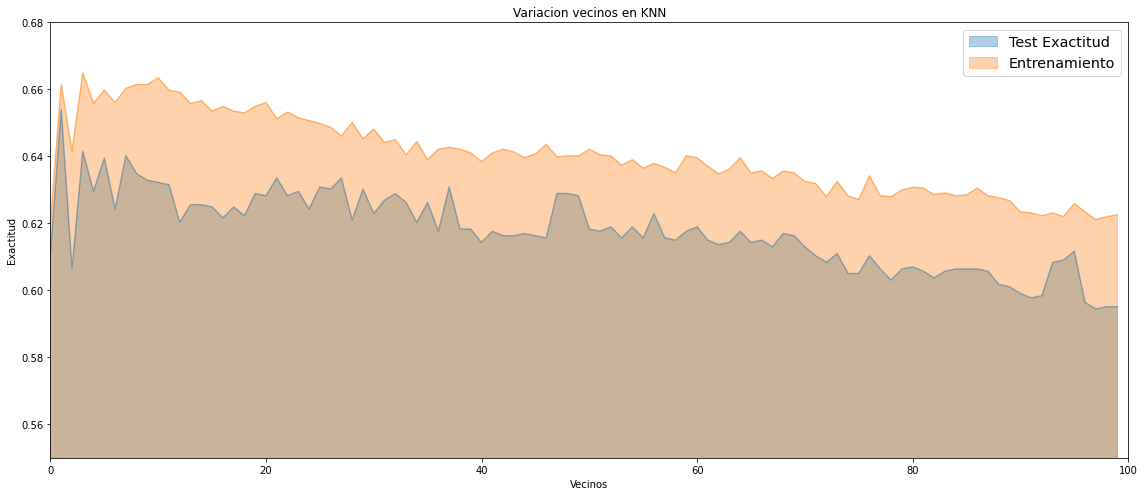

In [ ]:
grafo.plot(kind = 'area',figsize = (16,7),stacked = False, ylim = (0.55,0.68),alpha = 0.35,xlim = (0,100),legend = False)
plt.title('Variacion vecinos en KNN')
plt.legend(fontsize = 'x-large')
plt.xlabel('Vecinos')
plt.ylabel('Exactitud')
plt.tight_layout()
plt.savefig('Grafico_Area.pdf',format = 'pdf')

Vamos a predecir un valor tomando 30 vecinos, 40 minutos de asesoría y si tomó probabilidad (1).

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,Y_train)
pred1 = knn.predict([[40,1]])

Exactitud que tendremos con el valor resultado

In [ ]:
knn.score(X_test,Y_test)

0.6302186878727635

Valor resultado

In [ ]:
if pred1[0] == 1:
  print('Actuario')
else:
  print('Otra carrera de FCFM')

Otra carrera de FCFM
